# Table of Contents
1. [Introduction](#introduction)
2. [Project Overview](#project-overview)
3. [Data Understanding](#data-understanding)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Data Preprocessing and Feature Engineering](#data-preprocessing-and-feature-engineering)
6. [Model Selection](#model-selection)

# San Francisco Crime Classification and Analysis

## Introduction
This project delves into the Kaggle San Francisco Crime Classification dataset, featuring crime incident records in San Francisco from 2003 to 2015. The primary objective is to develop a predictive model capable of accurately identifying the type of crime based on provided data. This task entails a detailed exploratory analysis of the dataset and the application and refinement of machine learning models to maximize predictive accuracy.

## Project Overview
The project unfolds through several critical phases:

1. **Data Understanding**: Initially, we examine the dataset to understand its structure and content. This step involves loading the data, inspecting its shape, data types, and performing preliminary checks for issues like missing values and duplicates.

2. **Exploratory Data Analysis (EDA)**: Here, we conduct an in-depth exploration of the dataset to discern underlying patterns and characteristics of the crime data, which includes:
   - **Temporal Analysis**: Investigating crime trends across different times (days, months, years).
   - **Category Analysis**: Exploring the distribution and frequency of various crime types.
   - **Address Analysis**: Analyzing the types of addresses (blocks or intersections) linked with crime incidents.
   - **Geospatial Analysis**: Using geographic data to visualize crime distribution across San Francisco, offering crucial insights into spatial patterns.

3. **Data Cleaning and Preprocessing**: We address data quality issues, such as duplicates, outliers, and missing values, to ensure the dataset's cleanliness and reliability for modeling.

4. **Feature Engineering and Model Building**: New features are generated from the existing data to enhance the model's predictive capability. Various machine learning algorithms are then employed for crime classification.

5. **Model Evaluation and Selection**: The performance of different models is assessed using the Log Loss metric, which quantifies a classifier's accuracy by penalizing false classifications. The formula for Log Loss is:

   Log Loss = - (1/N) * Σ [i=1 to N] Σ [j=1 to M] y_ij * log(p_ij)


   In this formula:
   - \( N \) is the number of observations.
   - \( M \) is the number of class labels.
   - \( y_{ij} \) is a binary indicator of whether class label \( j \) is the correct classification for observation \( i \).
   - \( p_{ij} \) is the model's predicted probability that observation \( i \) is of class \( j \).

The analysis incorporates tools and libraries such as Pandas, Numpy, Seaborn, Matplotlib, GeoPandas, and Scikit-learn. By integrating statistical methods, data visualization, geospatial analysis, and machine learning, we aim to thoroughly understand San Francisco's crime patterns and develop a model that can accurately predict crime types.

# Importing the Dataset and Initial Data Understanding


## Importing the Data

The data is loaded using the Pandas library, which provides efficient data structures for data analysis. The datasets imported are:

1. **Training Data (`train.csv`)**: Contains the crime incidents, including the crime categories (target variable for prediction), descriptions, and other attributes.
2. **Test Data (`test.csv`)**: Includes similar attributes as the training data but without the crime categories. This dataset is used to test the predictive model.
3. **Sample Submission (`sampleSubmission.csv`)**: A template showing the format required for submitting predictions on the test set.

## Initial Data Exploration

The exploration process involves:

1. **Displaying the First Few Rows**: To understand the format and the type of data in each column.
2. **Shape of the Datasets**: Indicates the number of rows and columns in the training, test, and sample submission datasets.
3. **Data Types**: Shows the data type of each column (e.g., datetime, float, object).
4. **Summary Statistics for Numerical Columns**: Provides insights into the central tendency, dispersion, and shape of the dataset’s distribution.
5. **Dates Column Summary**: Gives the range of dates covered in the dataset and the number of unique dates.
6. **Frequency Counts for Categorical Columns**: Helps in understanding the distribution of categorical data like `DayOfWeek`, `PdDistrict`, and `Resolution`.
7. **Target Variable Analysis (`Category`)**: Essential for understanding the distribution of different types of crimes in the dataset.
8. **Null Value Check**: Identifies if there are any missing values in the dataset.
9. **Duplicate Rows**: Checks and removes any duplicated entries to maintain data integrity.

This initial exploration is critical for shaping the data preprocessing and feature engineering strategies that follow and for guiding the overall analysis and predictive modeling approach.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.dates as mdates
import geoplot as gplt
import math
import re
import time
from shapely.geometry import Point
from sklearn.impute import SimpleImputer
from matplotlib import cm
from matplotlib.colors import Normalize
from shapely import wkt
from matplotlib.ticker import FuncFormatter
from scipy.stats import gaussian_kde
from shapely.geometry import Point, Polygon, MultiPolygon
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, ElasticNet
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import StratifiedKFold
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval

# Load the datasets
train_data = pd.read_csv(r'C:\Users\user\Desktop\Kaggle_SF_Crime\train.csv', parse_dates=['Dates'])
test_data = pd.read_csv(r'C:\Users\user\Desktop\Kaggle_SF_Crime\test.csv', parse_dates=['Dates'], index_col='Id')
sample_submission = pd.read_csv(r'C:\Users\user\Desktop\Kaggle_SF_Crime\sampleSubmission.csv')

# Keep untouched training data for model
train = train_data.copy()

# Display the first few rows of the train dataset
print("Train Data:")
print(train_data.head())

# Display the first few rows of the test dataset
print("\nTest Data:")
print(test_data.head())

# Display the first few rows of the sample submission
print("\nSample Submission:")
print(sample_submission.head())

Train Data:
                Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -12

In [2]:
# Display the shape of the datasets
print("Shape of Train Data:", train_data.shape)
print("Shape of Test Data:", test_data.shape)
print("Shape of Sample Submission:", sample_submission.shape)

# Display the data types of each column in the datasets
print("\nData Types in Train Data:")
print(train_data.dtypes)

print("\nData Types in Test Data:")
print(test_data.dtypes)

print("\nData Types in Sample Submission:")
print(sample_submission.dtypes)

Shape of Train Data: (878049, 9)
Shape of Test Data: (884262, 6)
Shape of Sample Submission: (884262, 40)

Data Types in Train Data:
Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

Data Types in Test Data:
Dates         datetime64[ns]
DayOfWeek             object
PdDistrict            object
Address               object
X                    float64
Y                    float64
dtype: object

Data Types in Sample Submission:
Id                             int64
ARSON                          int64
ASSAULT                        int64
BAD CHECKS                     int64
BRIBERY                        int64
BURGLARY                       int64
DISORDERLY CONDUCT             int64
DRIVING UNDER THE INFLUENCE    int64
DRUG/NARCOTIC                  int64
DRUNKENNESS

In [3]:
# Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")
print(train_data.describe())

# Summary for 'Dates' Column (Datetime)
print("\nSummary Statistics for 'Dates' Column:")
print("Earliest Date:", train_data['Dates'].min())
print("Latest Date:", train_data['Dates'].max())
print("Number of Unique Dates:", train_data['Dates'].nunique())

# Frequency Counts for Categorical Columns (Excluding 'Dates')
print("\nFrequency Counts for Categorical Columns:")
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nFrequency of Categories in {col}:")
    print(train_data[col].value_counts())

# Frequency of the Target Variable 'Category'
print("\nFrequency of Categories in 'Category' (Target Variable):")
print(train_data['Category'].value_counts())

# Check for Null Values
print("\nNull Value Check in the Dataset:")
print(train_data.isnull().sum())



Summary Statistics for Numerical Columns:
                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

Summary Statistics for 'Dates' Column:
Earliest Date: 2003-01-06 00:01:00
Latest Date: 2015-05-13 23:53:00
Number of Unique Dates: 389257

Frequency Counts for Categorical Columns:

Frequency of Categories in Category:
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25

## Unusual Coordinates in the Dataset

Noticed anomalies in the dataset's geographical coordinates (`X` and `Y`) include values outside San Francisco's plausible range, necessitating investigation and potential correction for accurate spatial analysis.


In [4]:
# Check for duplicated rows in the train dataset
duplicates = train_data.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()
print("Number of duplicated rows in the train dataset:", num_duplicates)

# Optionally, you can display the duplicated rows
if num_duplicates > 0:
    print("Duplicated Rows:")
    print(train_data[duplicates])


Number of duplicated rows in the train dataset: 2323
Duplicated Rows:
                     Dates            Category  \
582    2015-05-12 11:30:00       LARCENY/THEFT   
1133   2015-05-03 23:00:00           VANDALISM   
1822   2015-05-02 02:30:00             ASSAULT   
2109   2015-05-01 11:30:00      OTHER OFFENSES   
3004   2015-04-29 10:00:00           VANDALISM   
...                    ...                 ...   
876933 2003-01-08 15:30:00            BURGLARY   
877116 2003-01-08 08:35:00      OTHER OFFENSES   
877117 2003-01-08 08:35:00  DISORDERLY CONDUCT   
877162 2003-01-08 05:50:00      OTHER OFFENSES   
877348 2003-01-07 18:25:00        PROSTITUTION   

                                                 Descript  DayOfWeek  \
582                          GRAND THEFT FROM LOCKED AUTO    Tuesday   
1133            MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Sunday   
1822                                              BATTERY   Saturday   
2109                DRIVERS LICENSE, SUSP

In [5]:
# Drop duplicate rows from the train dataset in place
train_data.drop_duplicates(inplace=True)

# Display the shape of the dataset after dropping duplicates
print("Shape of the train dataset after dropping duplicates:", train_data.shape)


Shape of the train dataset after dropping duplicates: (875726, 9)


## Handling Anomalous Geographical Coordinates

This section identifies and addresses anomalous geographic coordinates in the dataset. Rows with implausibly high latitude values (Y > 40) are identified, and their coordinates are replaced with the average coordinates of their respective police districts (`PdDistrict`), ensuring more accurate geospatial representation.


C:\Users\user\AppData\Local\Temp\ipykernel_38336\3419829074.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


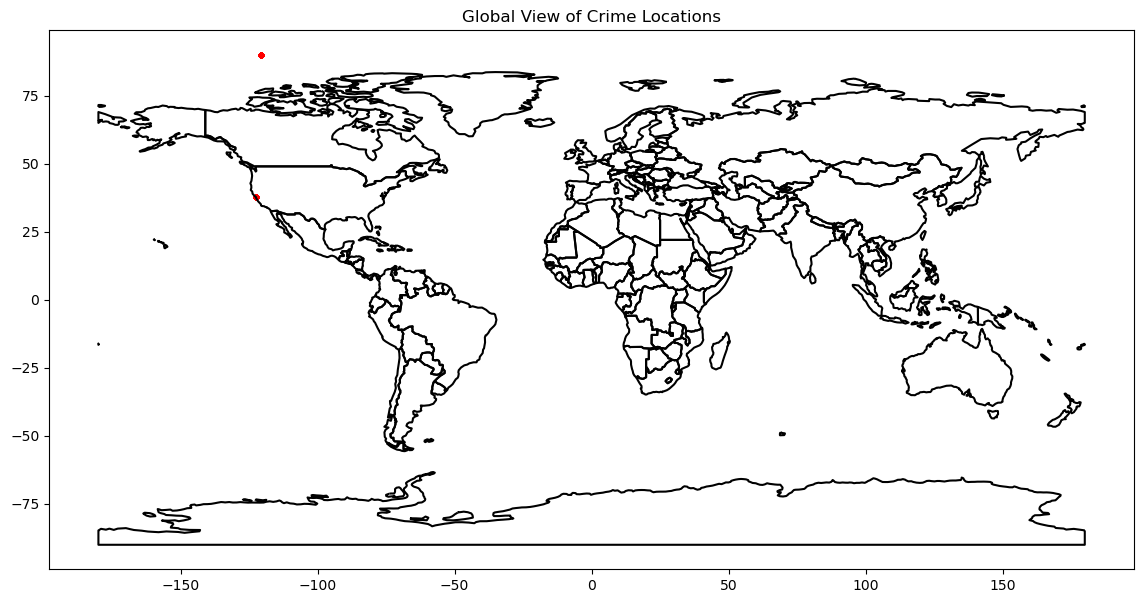

In [6]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(train_data, geometry=gpd.points_from_xy(train_data.X, train_data.Y))

# Set the coordinate reference system to WGS84
gdf.crs = "EPSG:4326"

# Load a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))  
world.boundary.plot(ax=ax, color='black')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)

# Adjust the aspect ratio
ax.set_aspect('auto', adjustable='datalim')

# Set title
ax.set_title("Global View of Crime Locations")
plt.show()

In [7]:
# Find rows where the Y coordinate is over 40
high_latitude_rows = train_data[train_data['Y'] > 40]

# Print these rows
print(high_latitude_rows)


                     Dates               Category  \
660485 2005-12-30 17:00:00          LARCENY/THEFT   
660711 2005-12-30 00:34:00                ASSAULT   
660712 2005-12-30 00:34:00                ASSAULT   
661106 2005-12-29 00:07:00           NON-CRIMINAL   
666430 2005-11-30 11:25:00         OTHER OFFENSES   
...                    ...                    ...   
844995 2003-06-11 08:49:00         OTHER OFFENSES   
845842 2003-06-09 09:25:00         OTHER OFFENSES   
852880 2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248 2003-04-14 16:30:00                ROBBERY   
871198 2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666

In [8]:
# Find rows where the Y coordinate is over 40
high_latitude_rows = train_data[train_data['Y'] > 40]

# Print value counts for the X and Y columns in these rows
print("Value Counts for X Coordinate in High Latitude Rows:")
print(high_latitude_rows['X'].value_counts())

print("\nValue Counts for Y Coordinate in High Latitude Rows:")
print(high_latitude_rows['Y'].value_counts())


Value Counts for X Coordinate in High Latitude Rows:
-120.5    67
Name: X, dtype: int64

Value Counts for Y Coordinate in High Latitude Rows:
90.0    67
Name: Y, dtype: int64


In [9]:
# Calculate the mean coordinates for each PdDistrict
mean_coordinates = train_data[train_data['Y'] <= 40].groupby('PdDistrict').agg({'X': 'mean', 'Y': 'mean'})

# Replace X and Y in high_latitude_rows with the mean coordinates of their respective PdDistrict
for district in high_latitude_rows['PdDistrict'].unique():
    mean_x, mean_y = mean_coordinates.loc[district]
    train_data.loc[(train_data['Y'] > 40) & (train_data['PdDistrict'] == district), 'X'] = mean_x
    train_data.loc[(train_data['Y'] > 40) & (train_data['PdDistrict'] == district), 'Y'] = mean_y

# Check if the replacement was successful
print("Check replaced values:")
print(train_data[train_data['Y'] > 40][['PdDistrict', 'X', 'Y']])


Check replaced values:
Empty DataFrame
Columns: [PdDistrict, X, Y]
Index: []


# Exploratory Data Analysis

## Overview
In this section, we perform Exploratory Data Analysis (EDA) to gain deeper insights into the relationships within our dataset and identify features that could be pivotal for our Classification Model. EDA is a crucial step in data science to understand the underlying patterns and characteristics of the data, guiding further analysis and model development.

## Key Analysis Performed
- **Temporal Trends**: Analyzing the number of incidents over time, broken down by month, day of the week, day of the month, and hour of the day, to observe any temporal patterns in crime occurrences.
- **Crime Category Distribution**: Exploring the frequency of different crime categories and the proportion of crimes occurring at blocks versus intersections. This helps in understanding the most common types of crimes and their locations.
- **Geospatial Analysis**: Visualizing crime incidents on a map to understand their geographical distribution across San Francisco's police districts. This includes correcting anomalies in geographical data for accurate mapping.
- **Heatmaps and Pivot Tables**: Using heatmaps to visualize the distribution of crime categories across different times and locations, providing a comprehensive view of the data's structure.

This exploratory analysis aims to uncover important trends and features in the dataset that will inform the development of a robust and accurate crime classification model.


## Temporal Trends Analysis
This analysis examines crime incidents over time, identifying patterns in monthly, daily, and hourly crime frequencies. It helps reveal temporal dynamics in crime occurrences, essential for understanding peak times and guiding predictive modeling.

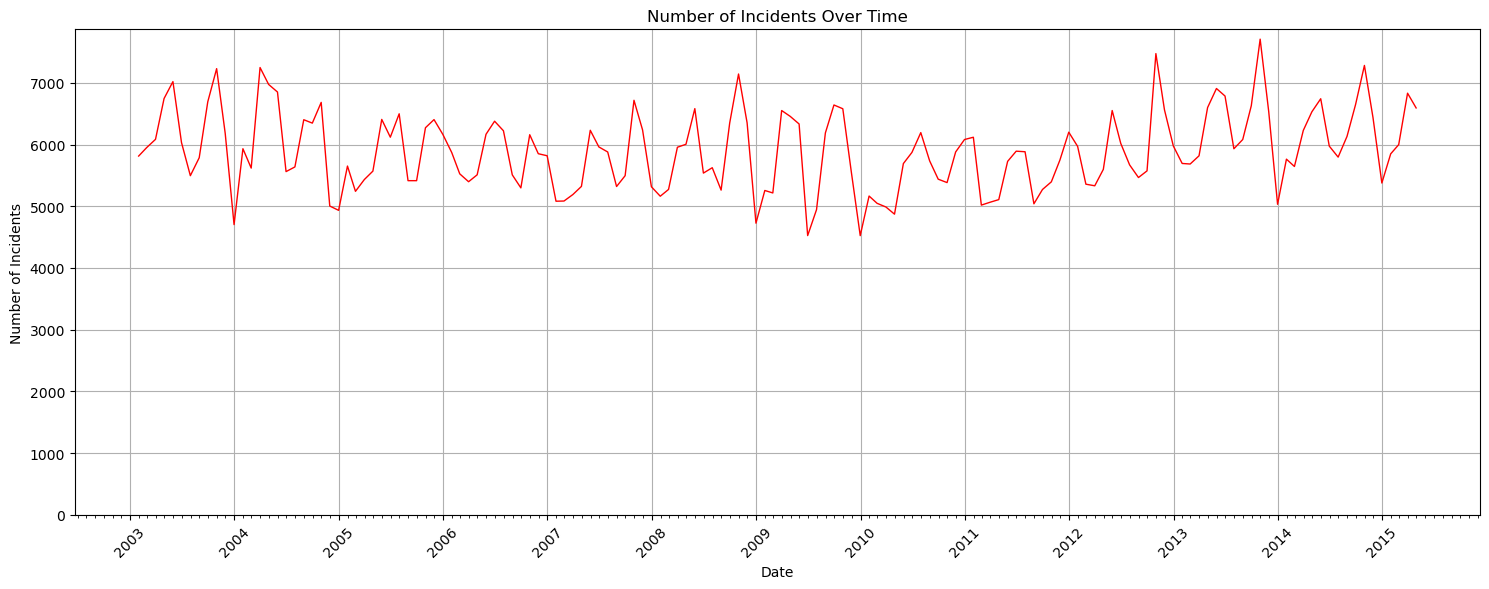

In [10]:
# Resample to get the count of incidents per month
monthly_data = train_data.resample('M', on='Dates').size()

# Exclude the last month if it's not complete
if monthly_data.index[-1].month != pd.Timestamp.now().month:
    monthly_data = monthly_data[:-1]

# Creating the plot
plt.figure(figsize=(15, 6))
plt.plot(monthly_data.index, monthly_data.values, color='red', linewidth=1)

# Setting the title and labels
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Formatting the x-axis to handle dates appropriately
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.grid(True)

# Set y-axis to start from 0
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

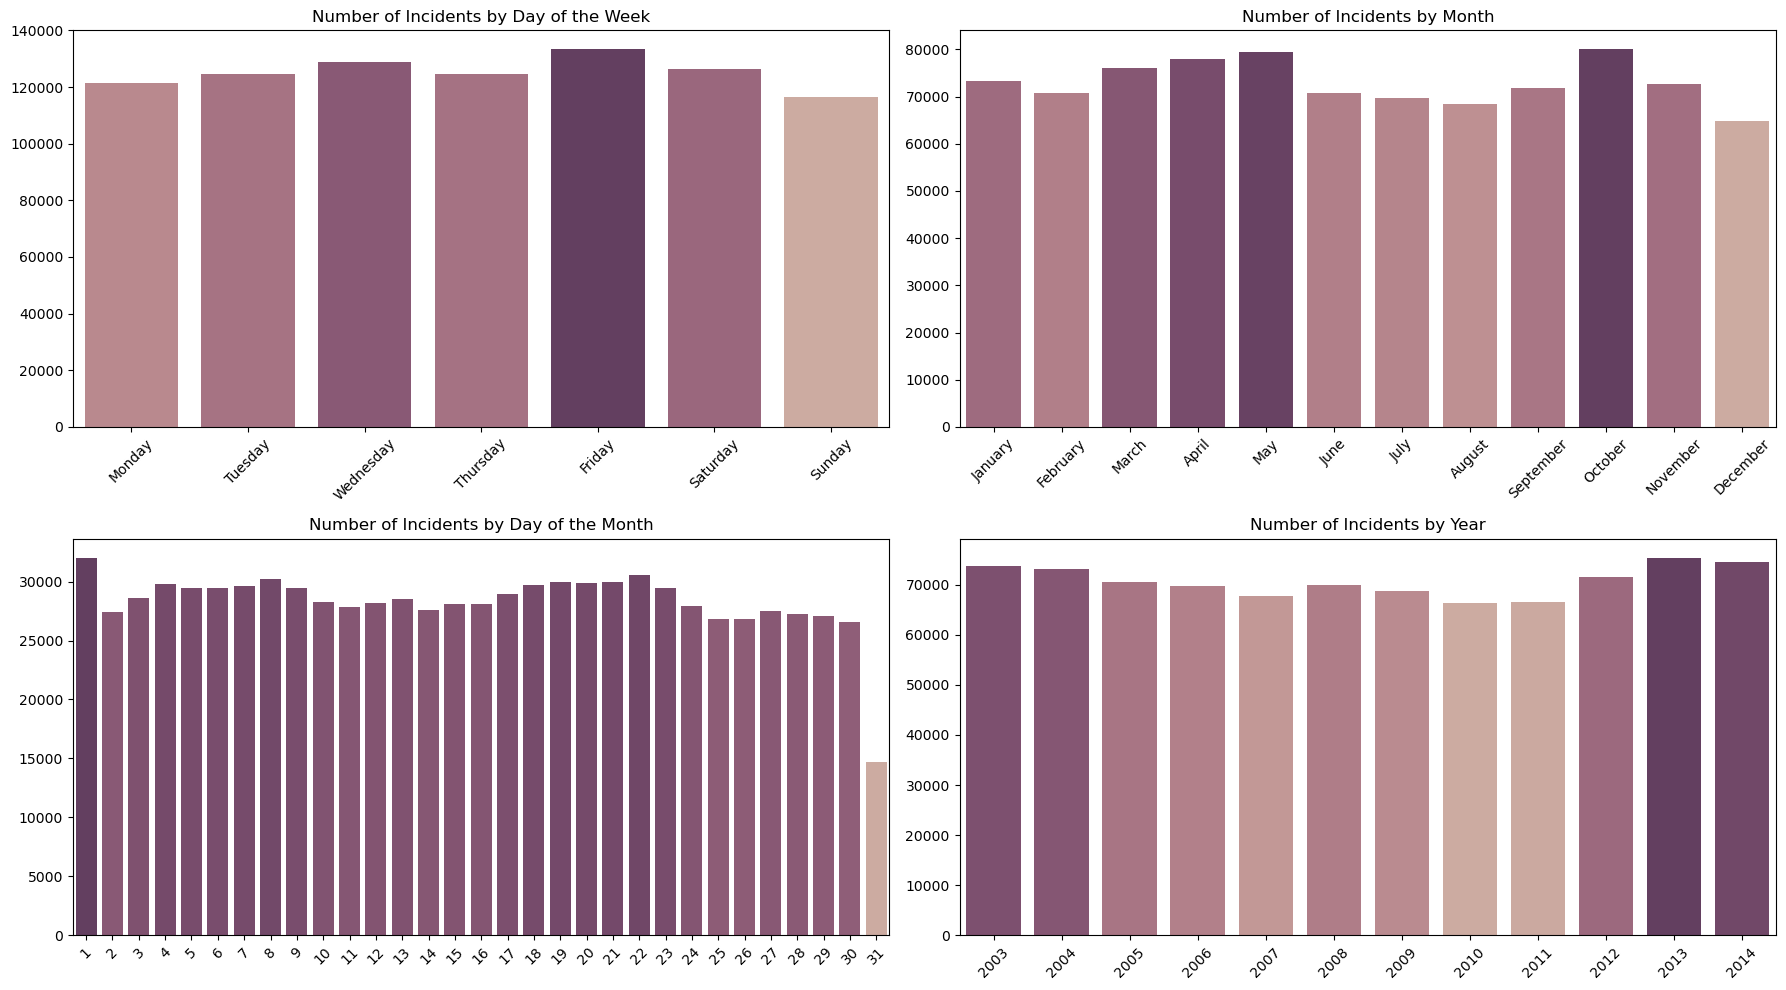

In [11]:
# Extract day of the month, month, and year
train_data['DayOfMonth'] = train_data['Dates'].dt.day
train_data['Month'] = train_data['Dates'].dt.month_name()
train_data['Year'] = train_data['Dates'].dt.year

# Filter out incomplete year 2015
year_counts = train_data[train_data['Year'] != 2015]['Year'].value_counts().sort_index()

# Compute counts for each category
day_of_week_counts = train_data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_month_counts = train_data['DayOfMonth'].value_counts().sort_index()
month_counts = train_data['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a red-toned cubehelix palette
cubehelix_palette = sns.cubehelix_palette(start=0, rot=0.5, dark=0.3, light=0.7, as_cmap=True)

# Function to apply color mapping
def apply_color_mapping(counts):
    norm = Normalize(vmin=counts.min(), vmax=counts.max())
    colors = cm.ScalarMappable(norm=norm, cmap=cubehelix_palette).to_rgba(counts)
    return colors

# Plotting with adjusted layout
plt.figure(figsize=(18, 10))

# Number of Incidents by Day of the Week
plt.subplot(2, 2, 1)
colors = apply_color_mapping(day_of_week_counts.values)
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette=colors)
plt.title('Number of Incidents by Day of the Week')
plt.xticks(rotation=45)

# Number of Incidents by Month
plt.subplot(2, 2, 2)
colors = apply_color_mapping(month_counts.values)
sns.barplot(x=month_counts.index, y=month_counts.values, palette=colors)
plt.title('Number of Incidents by Month')
plt.xticks(rotation=45)

# Number of Incidents by Day of the Month
plt.subplot(2, 2, 3)
colors = apply_color_mapping(day_of_month_counts.values)
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette=colors)
plt.title('Number of Incidents by Day of the Month')
plt.xticks(rotation=45)

# Number of Incidents by Year
plt.subplot(2, 2, 4)
colors = apply_color_mapping(year_counts.values)
sns.barplot(x=year_counts.index, y=year_counts.values, palette=colors)
plt.title('Number of Incidents by Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

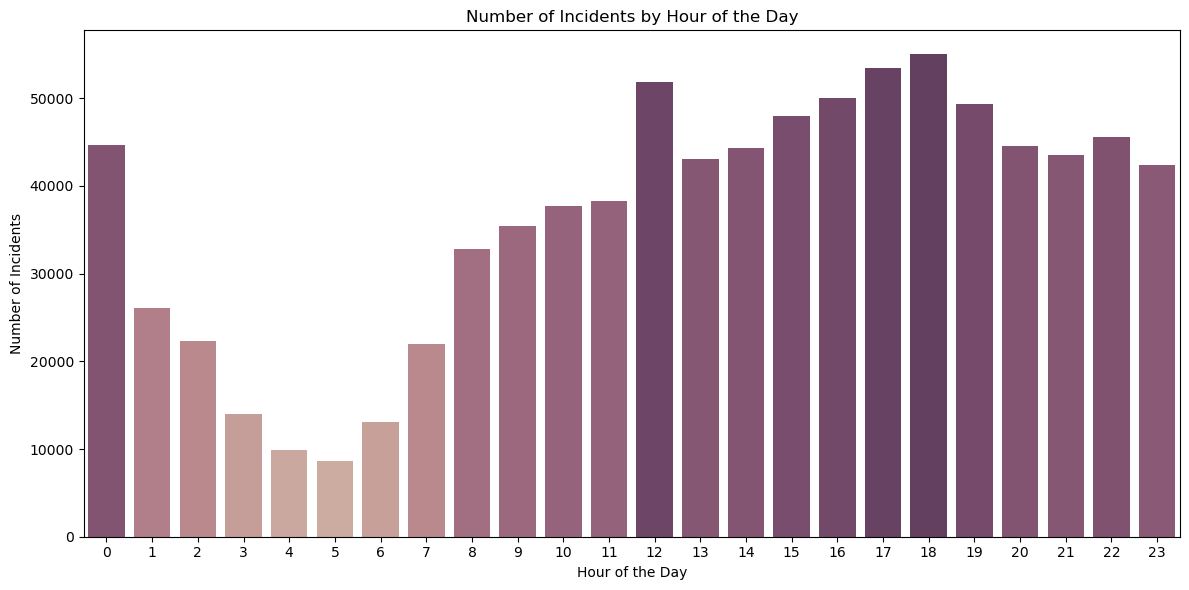

In [12]:
# Extract hour from the Dates column
train_data['Hour'] = train_data['Dates'].dt.hour

# Compute counts for each hour
hourly_counts = train_data.groupby('Hour').size()

# Creating the colormap
cubehelix_palette = sns.cubehelix_palette(start=0, rot=0.5, dark=0.3, light=0.7, as_cmap=True)

# Function to apply color mapping
def apply_color_mapping(counts):
    norm = Normalize(vmin=counts.min(), vmax=counts.max())
    colors = cm.ScalarMappable(norm=norm, cmap=cubehelix_palette).to_rgba(counts)
    return colors

# Plotting
plt.figure(figsize=(12, 6))

# Number of Incidents by Hour of the Day
colors = apply_color_mapping(hourly_counts)
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette=colors)
plt.title('Number of Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

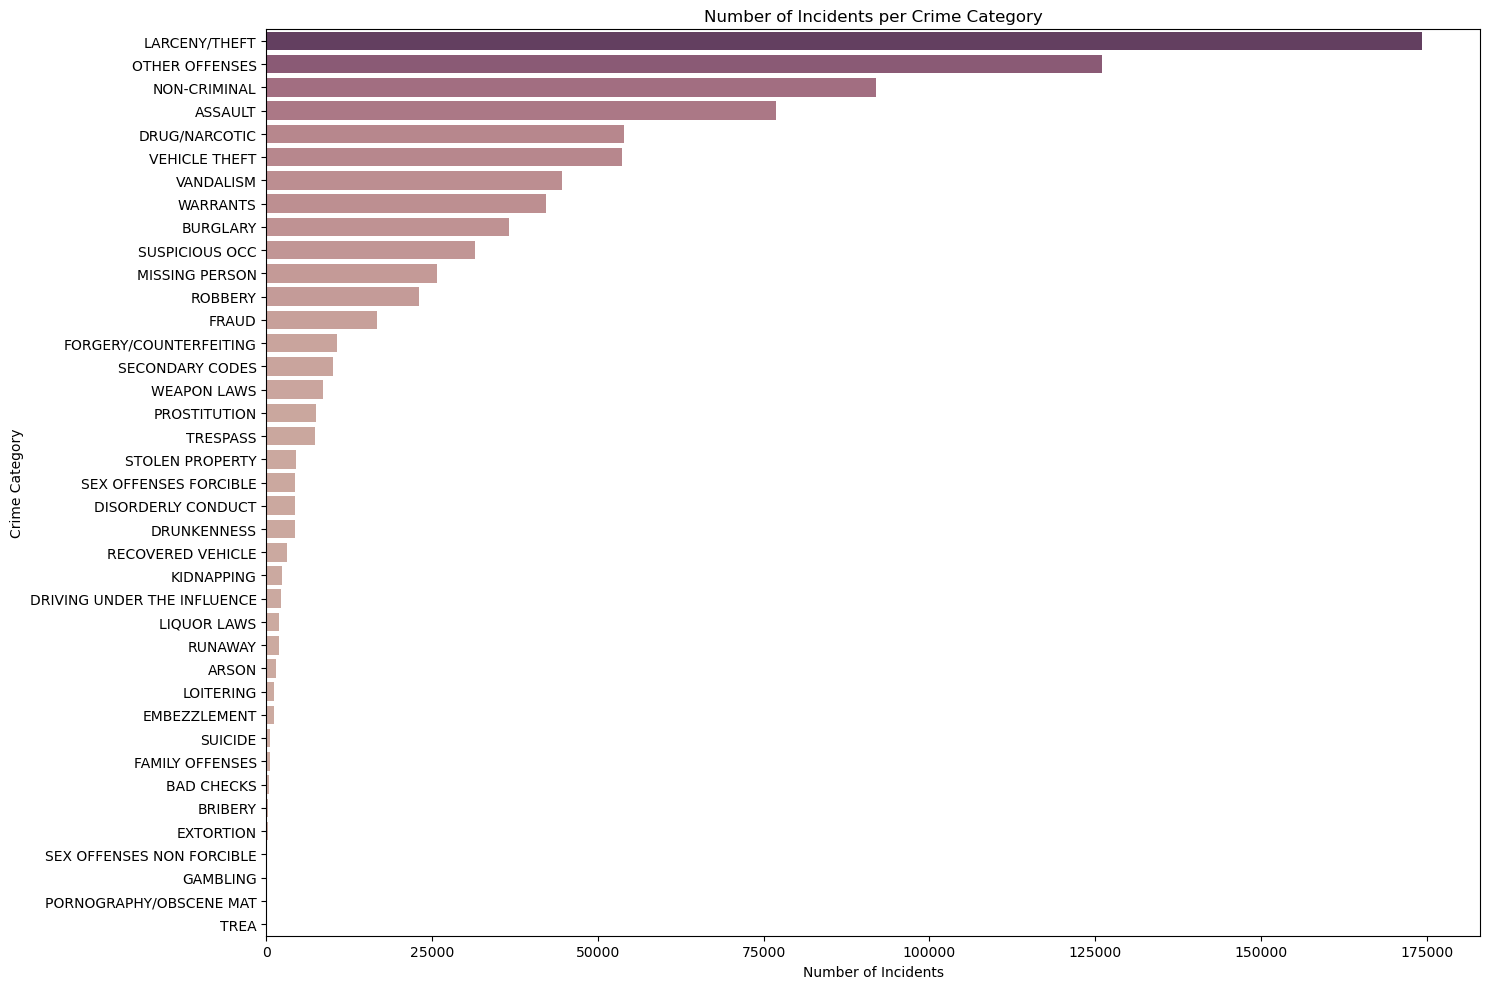

In [13]:
# Compute counts for each crime category
category_counts = train_data['Category'].value_counts()

# Plotting
plt.figure(figsize=(15, 10))

# Number of Incidents for each Crime Category
colors = apply_color_mapping(category_counts)
sns.barplot(y=category_counts.index, x=category_counts.values, palette=colors, orient='h')
plt.title('Number of Incidents per Crime Category')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')

plt.tight_layout()
plt.show()

## Crime Category Distribution Analysis
This segment focuses on the frequency and distribution of various crime categories, highlighting the most prevalent types of crimes and their relative occurrences in the dataset.

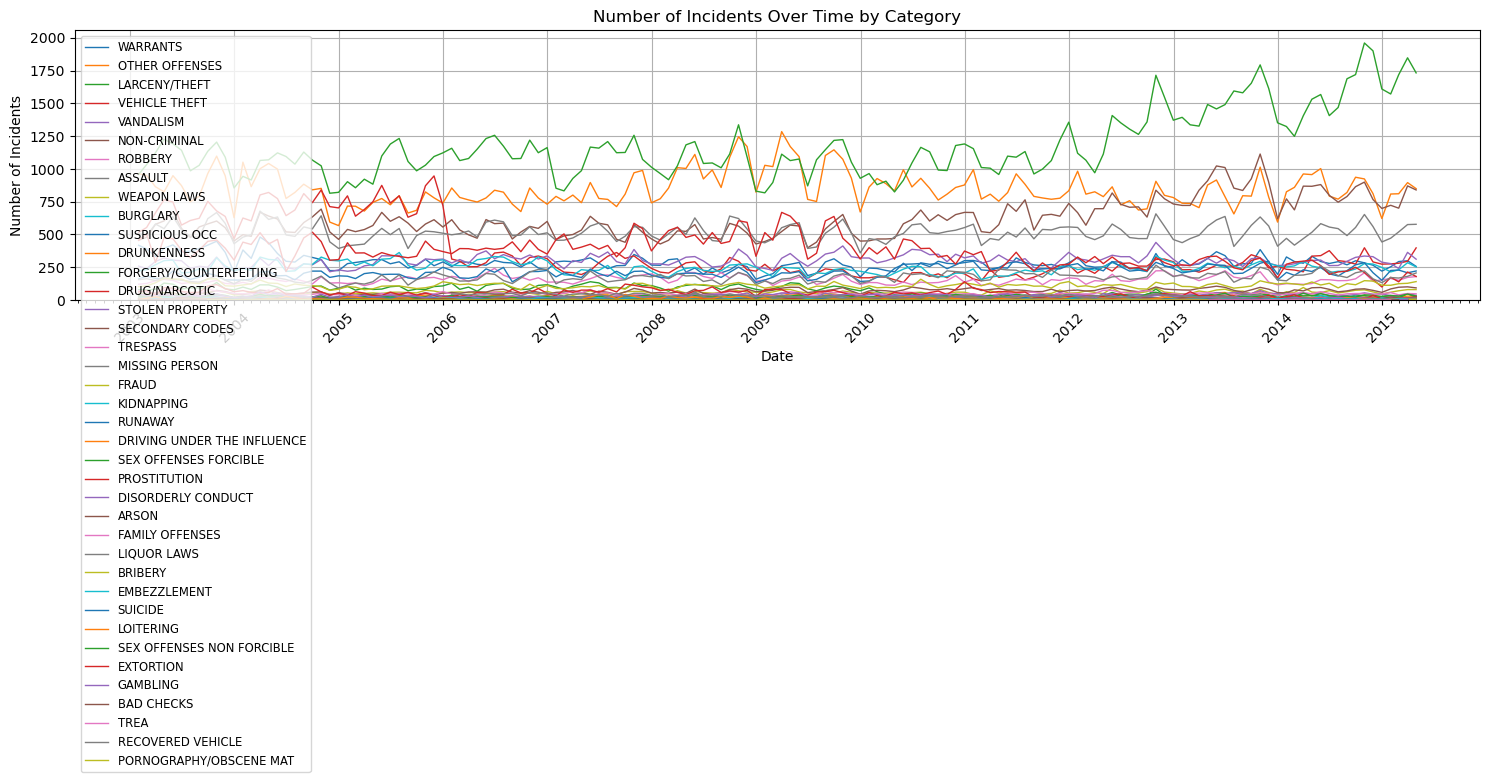

In [14]:
# Set the figure
plt.figure(figsize=(15, 6))

# Get a list of unique categories
categories = train_data['Category'].unique()

# Resample and plot for each category
for category in categories:
    # Resample to get the count of incidents per month for each category
    monthly_data = train_data[train_data['Category'] == category].resample('M', on='Dates').size()

    # Exclude the last month if it's not complete
    if monthly_data.index[-1].month != pd.Timestamp.now().month:
        monthly_data = monthly_data[:-1]

    plt.plot(monthly_data.index, monthly_data.values, linewidth=1, label=category)

# Setting the title and labels
plt.title('Number of Incidents Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Formatting the x-axis to handle dates appropriately
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

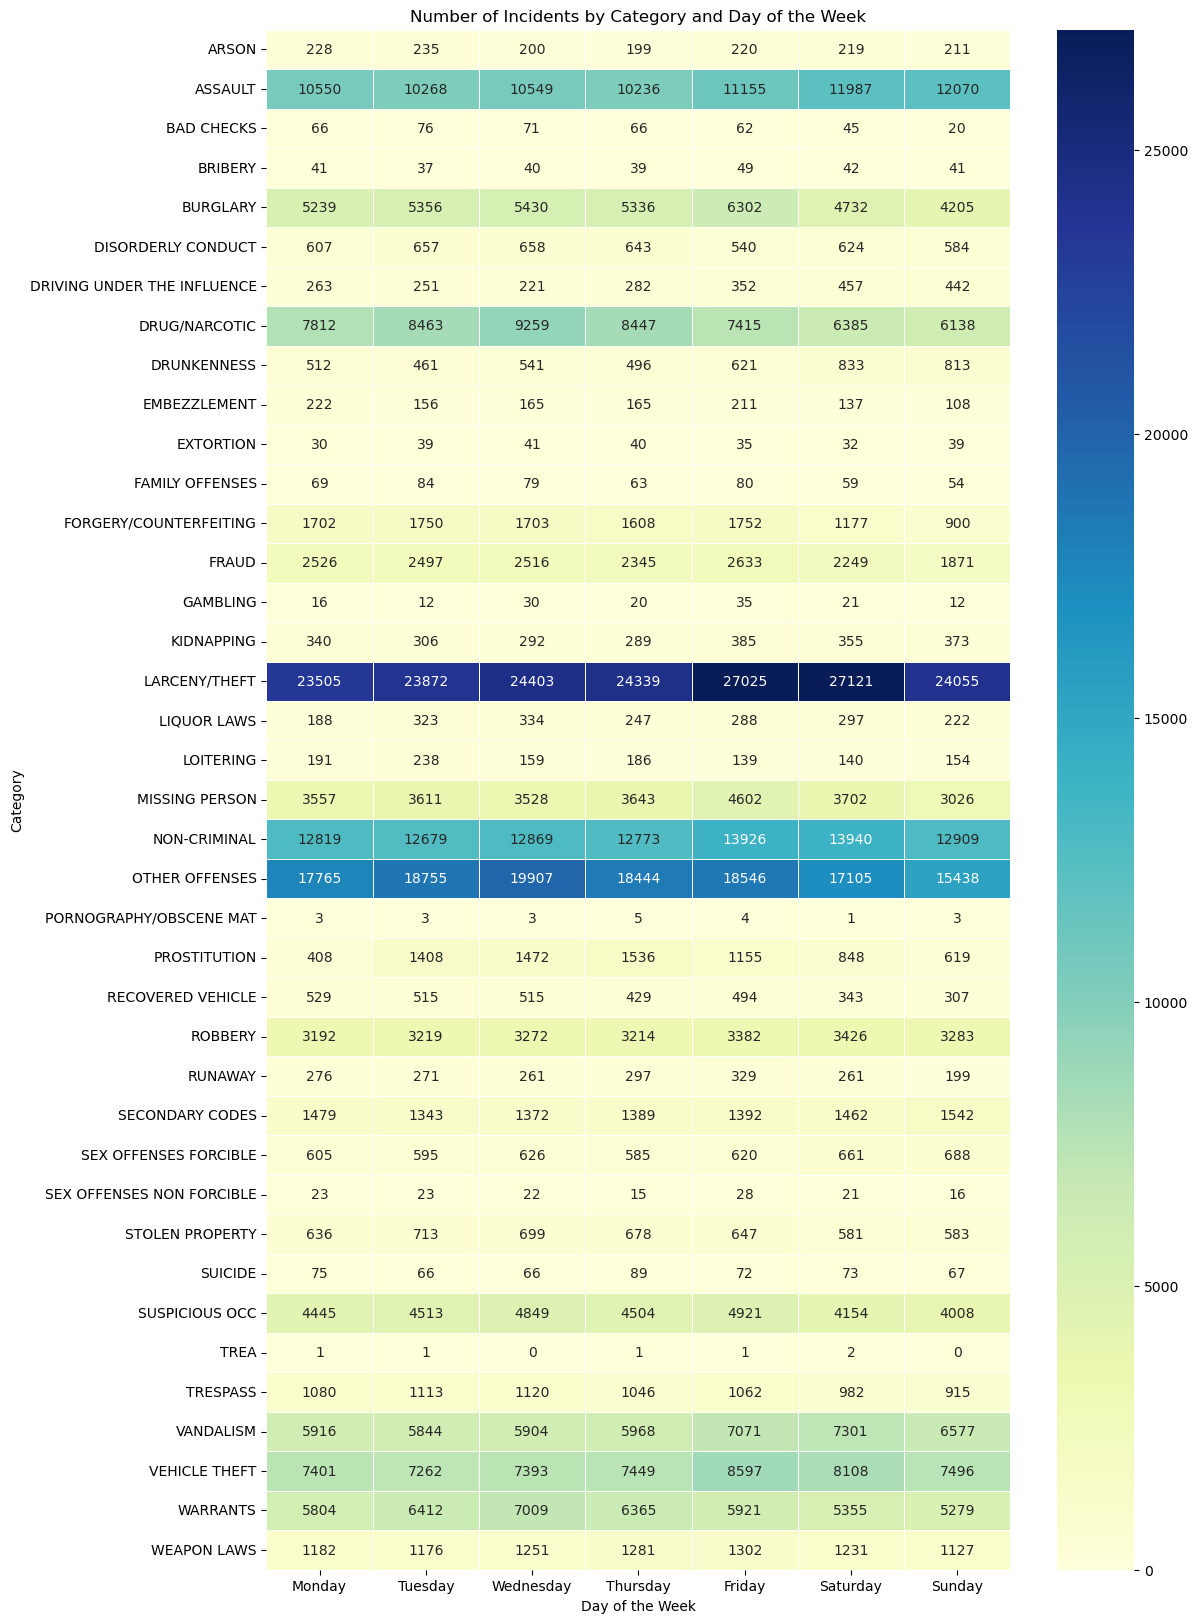

In [15]:
# Create a pivot table with counts of each category by day of the week
pivot_table = train_data.pivot_table(index='Category', columns='DayOfWeek', aggfunc='size', fill_value=0)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[days_order]

# Create the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt="d")

# Setting the title and labels
plt.title('Number of Incidents by Category and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Category')

plt.show()

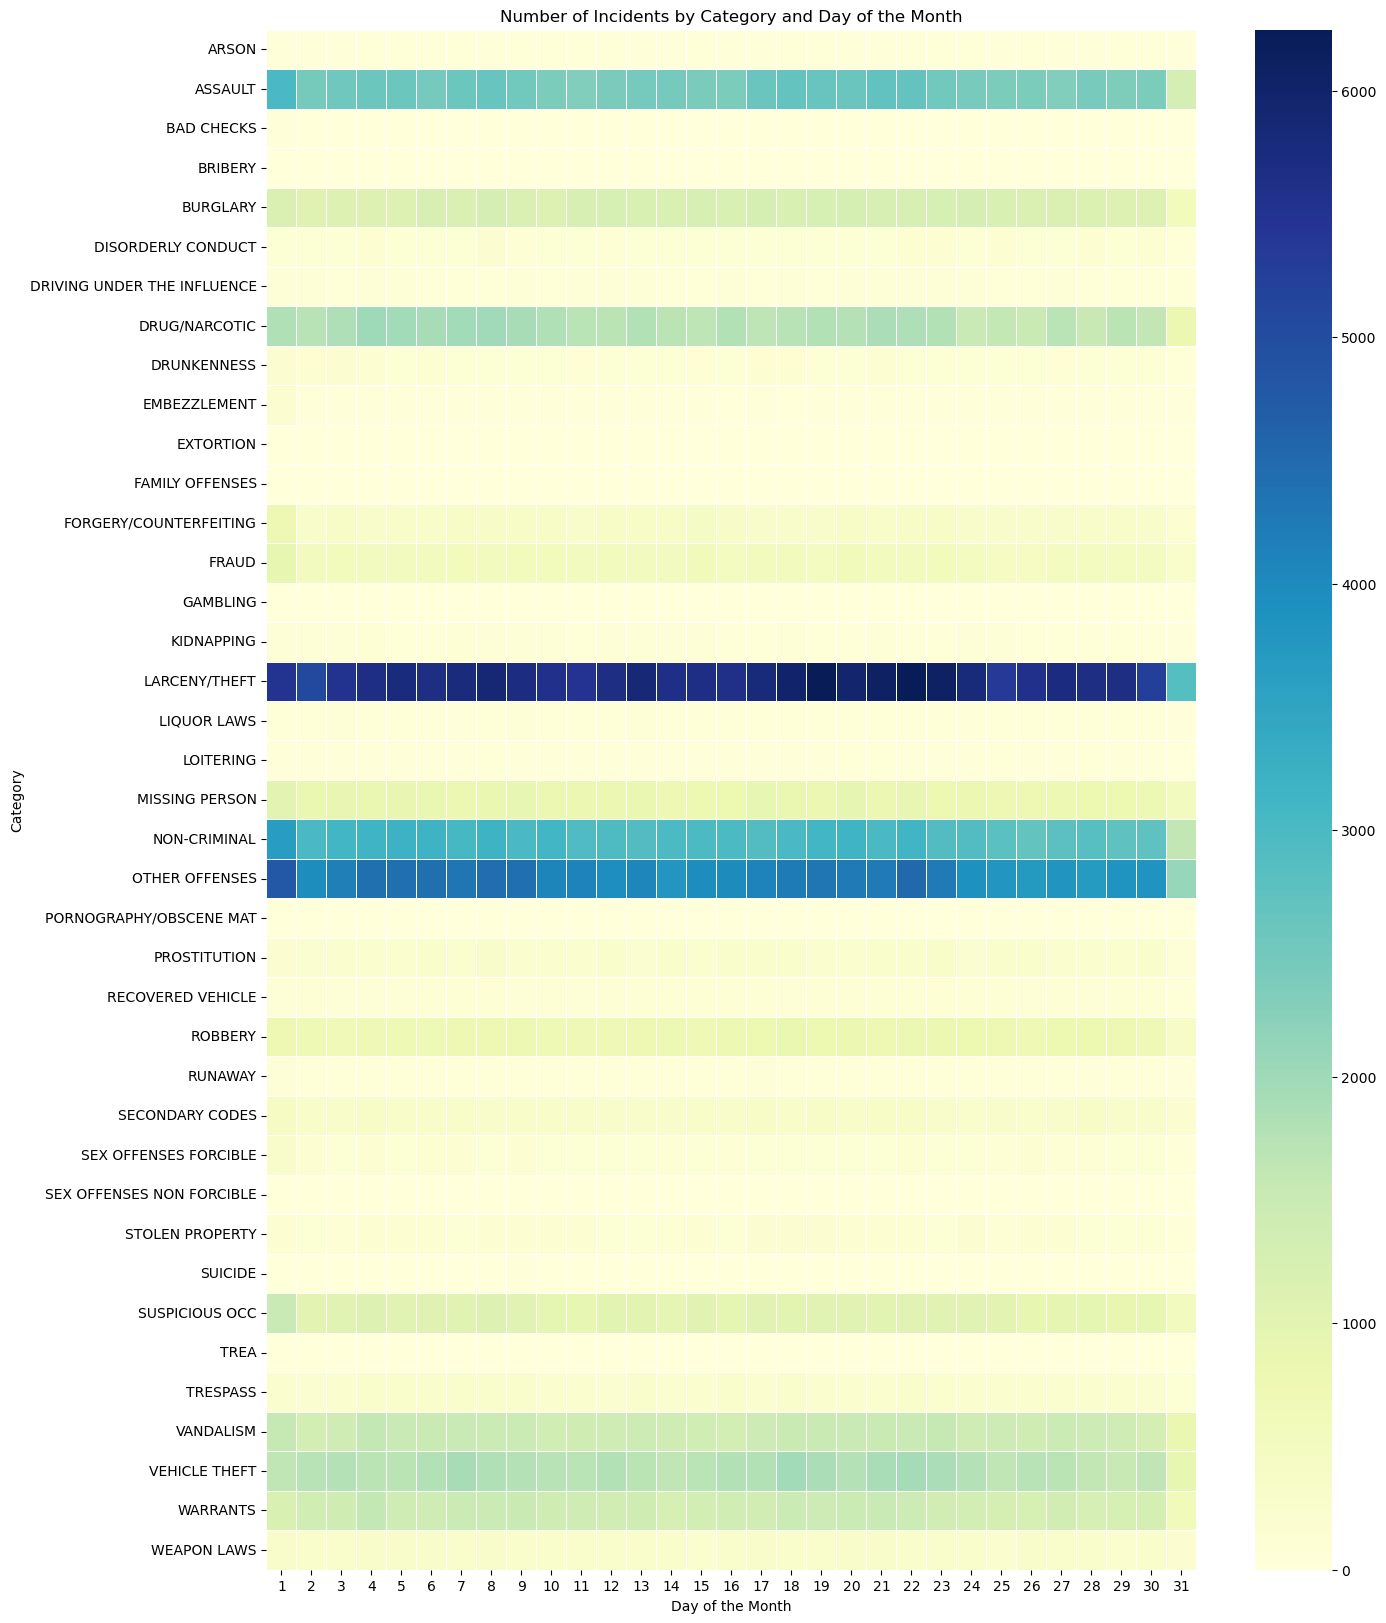

In [16]:

# Create a pivot table with counts of each category by day of the month
pivot_table = train_data.pivot_table(index='Category', columns=train_data['Dates'].dt.day, aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=False)  # set annot=True if you want to see the numbers

# Setting the title and labels
plt.title('Number of Incidents by Category and Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Category')

plt.show()

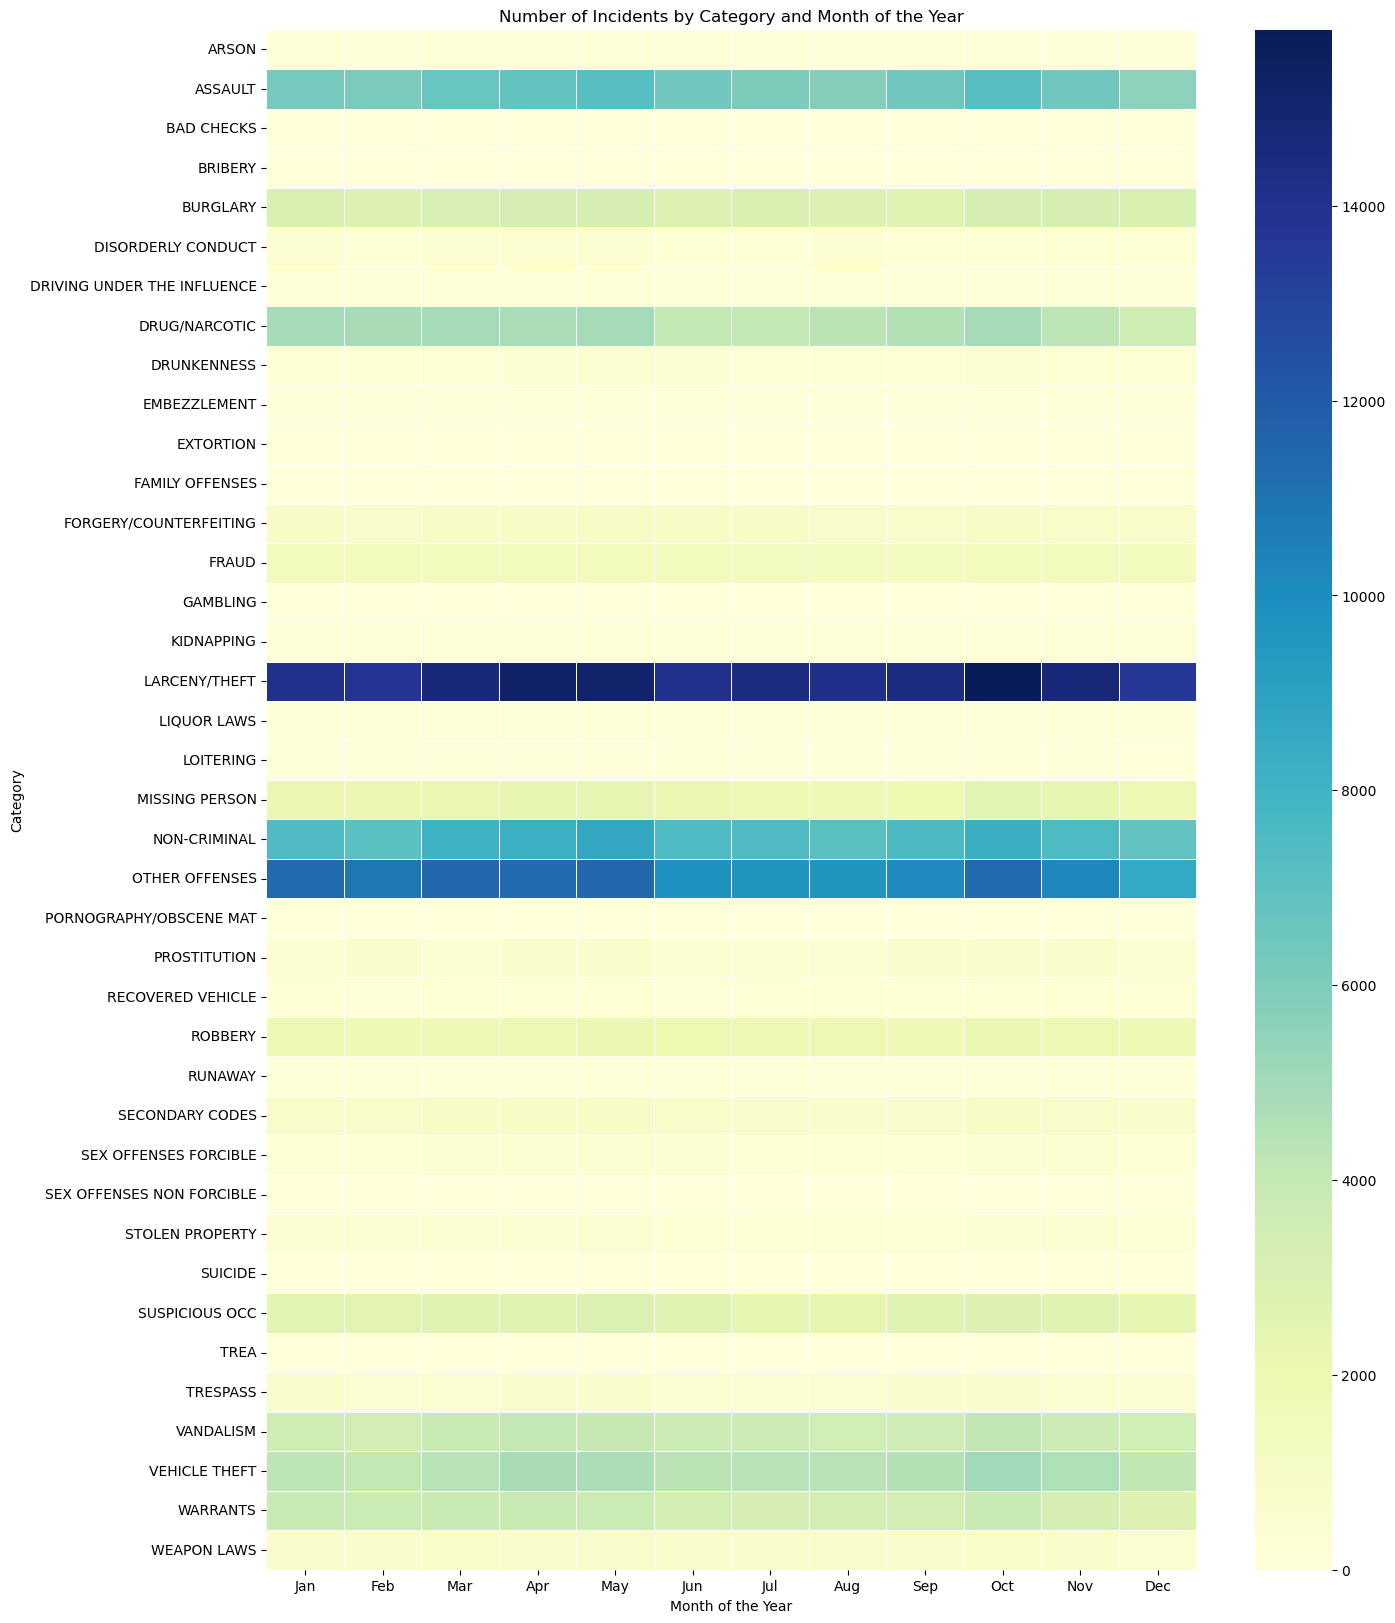

In [17]:
# Create a pivot table with counts of each category by month of the year
pivot_table = train_data.pivot_table(index='Category', columns=train_data['Dates'].dt.month, aggfunc='size', fill_value=0)

# Rename the months for better readability
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
pivot_table.rename(columns=month_names, inplace=True)

# Create the heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=False)  # set annot=True if you want to see the numbers

# Setting the title and labels
plt.title('Number of Incidents by Category and Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Category')

plt.show()

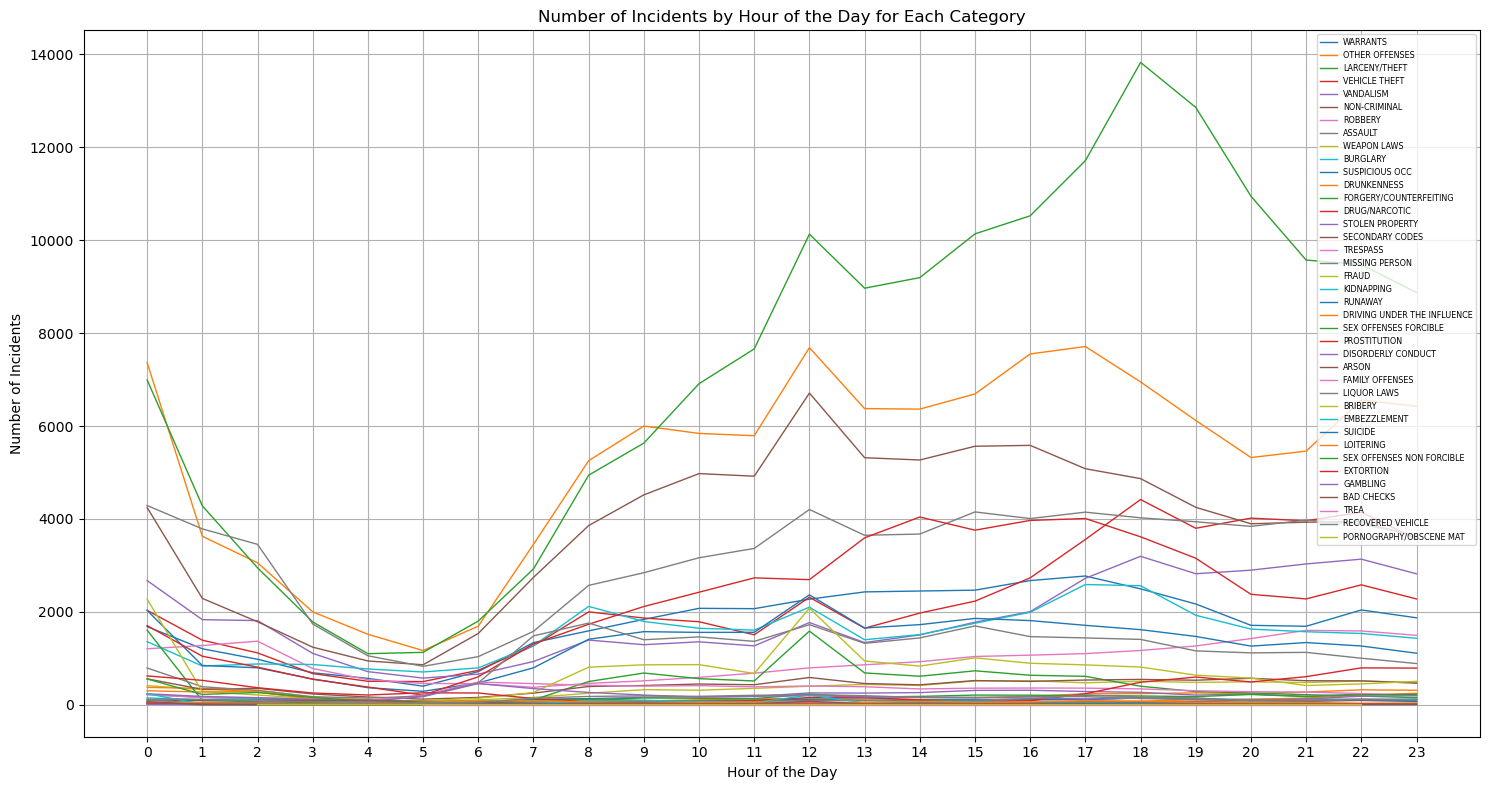

In [18]:
# Set the figure
plt.figure(figsize=(15, 8))

# Get a list of unique categories
categories = train_data['Category'].unique()

# Plot for each category
for category in categories:
    # Group by hour and count the number of incidents for each category
    hourly_data = train_data[train_data['Category'] == category].groupby('Hour').size()
    
    # Plotting
    plt.plot(hourly_data.index, hourly_data.values, linewidth=1, label=category)

# Setting the title and labels
plt.title('Number of Incidents by Hour of the Day for Each Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))
plt.legend(loc='upper right', fontsize='xx-small')

plt.grid(True)
plt.tight_layout()
plt.show()

## Geospatial Analysis by District and Address Type
Geospatial analysis visualizes crime data by police districts and address types, offering insights into spatial crime patterns and hotspot areas in San Francisco.

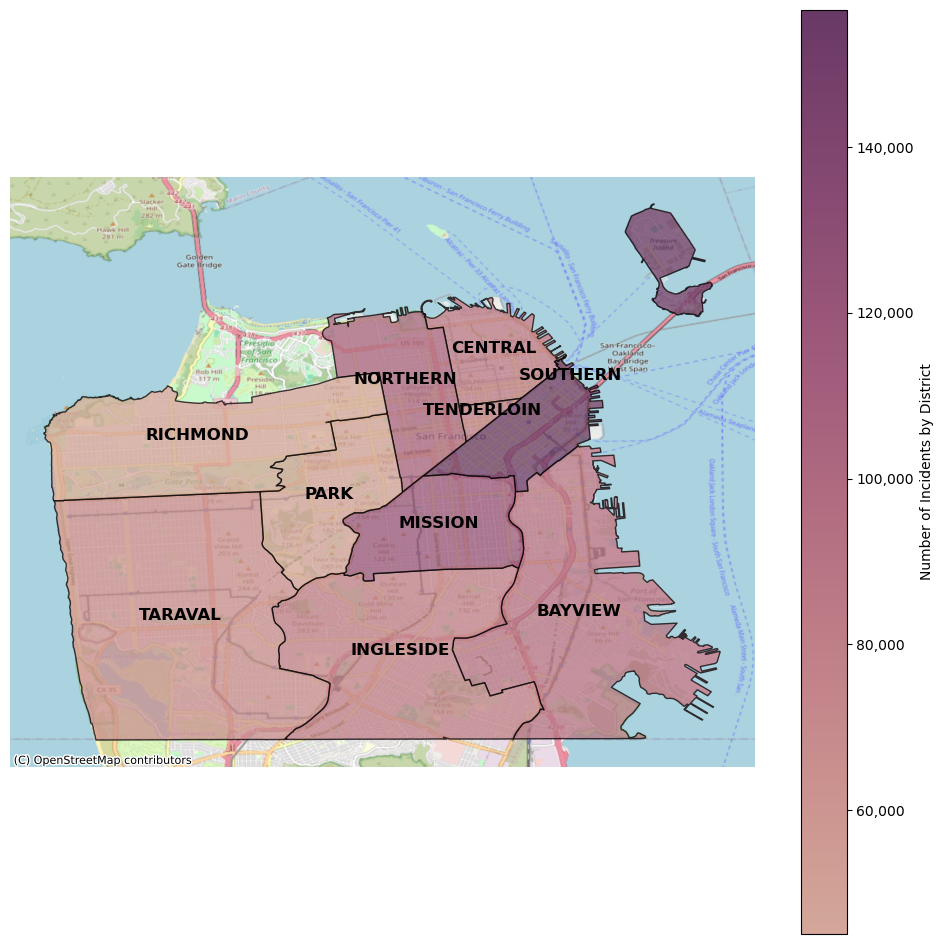

In [19]:
# Load CSV data
policedistricts = pd.read_csv(r'C:\Users\user\Desktop\Kaggle_SF_Crime\sfpd_districts_historic_20240110.csv')

# Convert 'the_geom' column from WKT to a GeoPandas geometry
policedistricts['the_geom'] = policedistricts['the_geom'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame and set the geometry
districts_gdf = gpd.GeoDataFrame(policedistricts, geometry='the_geom')

# Set the coordinate system to WGS 84 (latitude and longitude)
districts_gdf.set_crs(epsg=4326, inplace=True)

# Count the number of incidents in each police district
incident_counts = train_data.groupby('PdDistrict').size().reset_index(name='Incidents')

# Merge this with the geospatial data
districtcounts_gdf = districts_gdf.merge(incident_counts, how='left', left_on='DISTRICT', right_on='PdDistrict')

# Normalize the incident counts for the color mapping
norm = Normalize(vmin=districtcounts_gdf['Incidents'].min(), vmax=districtcounts_gdf['Incidents'].max())
cmap = cm.ScalarMappable(norm=norm, cmap=cubehelix_palette)

# Plot the districts
fig, ax = plt.subplots(figsize=(12, 12))
districtcounts_gdf.plot(ax=ax, edgecolor='black', column='Incidents', cmap=cubehelix_palette, alpha=0.75)

# Adding a legend with custom formatting
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
cbar = fig.colorbar(cmap, ax=ax, format=formatter)
cbar.set_label('Number of Incidents by District')

# Set the outside area color to white
ax.set_facecolor('white')

# Add a basemap using OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=districts_gdf.crs)

# Add district names
for idx, row in districtcounts_gdf.iterrows():
    plt.annotate(text=row['DISTRICT'], xy=(row['the_geom'].centroid.x, row['the_geom'].centroid.y), 
                 ha='center', fontsize=12, fontweight='bold', color='black')

# Remove axes
ax.set_axis_off()

# Show the plot
plt.show()

In [20]:
# Convert training data to a GeoDataFrame
train_gdf = gpd.GeoDataFrame(
    train_data, 
    geometry=gpd.points_from_xy(train_data.X, train_data.Y),
    crs={'init': 'epsg:4326'}
)

# Filter categories with over 1000 counts
category_counts = train_data['Category'].value_counts()
categories = category_counts[category_counts > 1000].index.tolist()

def plot_category_distribution(categories_subset, train_gdf, districts_gdf):
    # Determine the number of rows and columns for subplots
    num_categories = len(categories_subset)
    cols = 3
    rows = math.ceil(num_categories / cols)

    # Set up the figure for subplots
    fig, axs = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axs = axs.flatten() if num_categories > 1 else [axs]

    # Plot KDE for each crime category in the subset
    for i, crime in enumerate(categories_subset):
        data = train_gdf[train_gdf['Category'] == crime]
        ax = axs[i]

        # KDE plot
        if len(data) > 0:
            x = data.geometry.x
            y = data.geometry.y
            kde = gaussian_kde([x, y])
            xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
            zz = np.reshape(kde([xx.flatten(), yy.flatten()]), xx.shape)
            
            ax.contourf(xx, yy, zz, levels=10, cmap='Reds')

        # Plot district boundaries
        districts_gdf.plot(ax=ax, edgecolor='black', facecolor='none')

        ax.set_title(crime)
        ax.axis('equal')
        ax.set_xticks([])  
        ax.set_yticks([])  

    # Hide any unused axes
    for ax in axs[len(categories_subset):]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


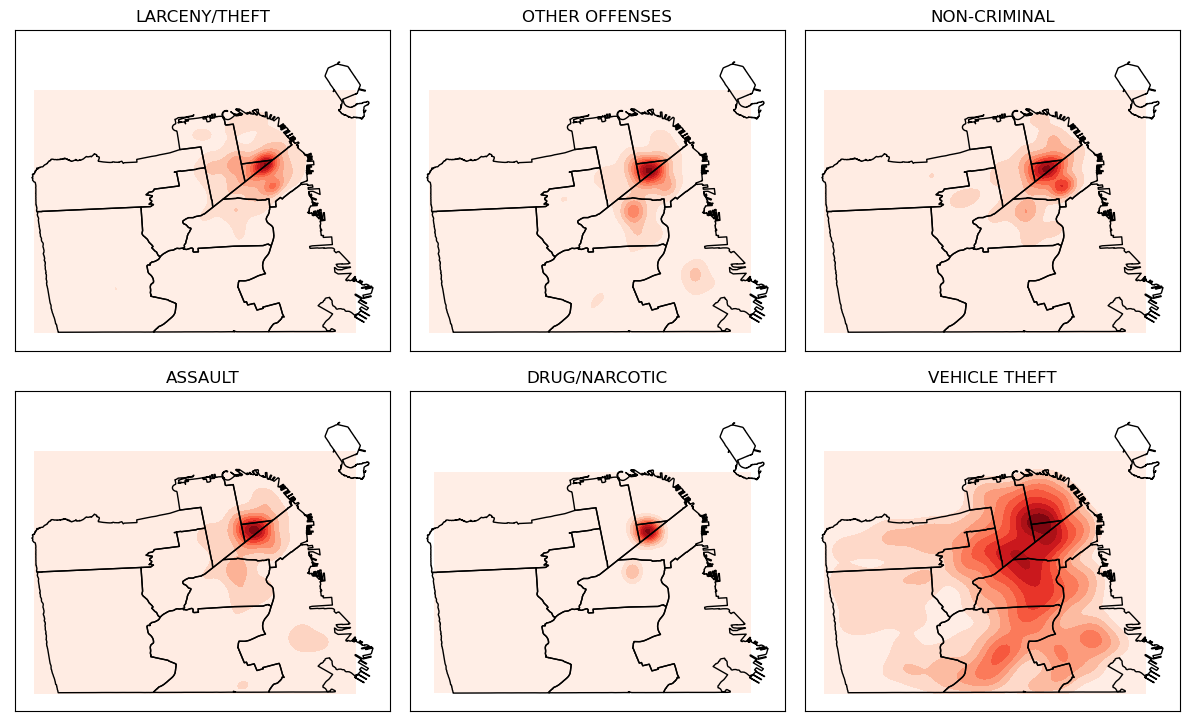

In [21]:
plot_category_distribution(categories[0:6], train_gdf, districts_gdf)

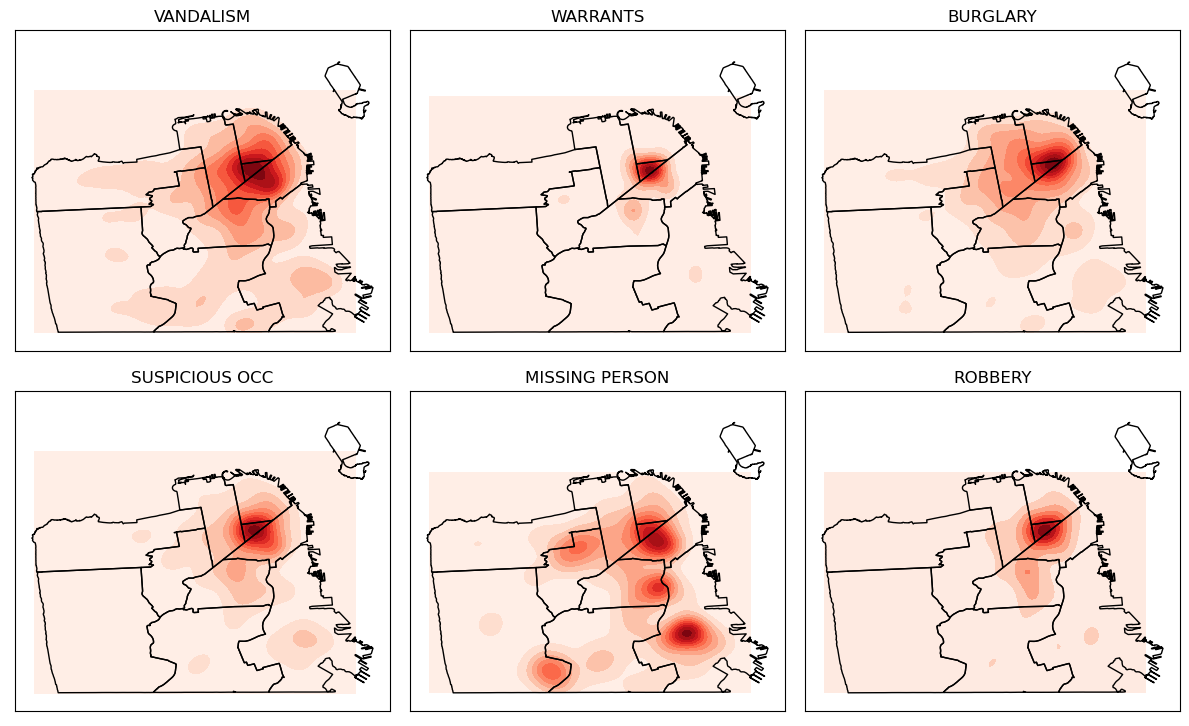

In [22]:
plot_category_distribution(categories[6:12], train_gdf, districts_gdf)

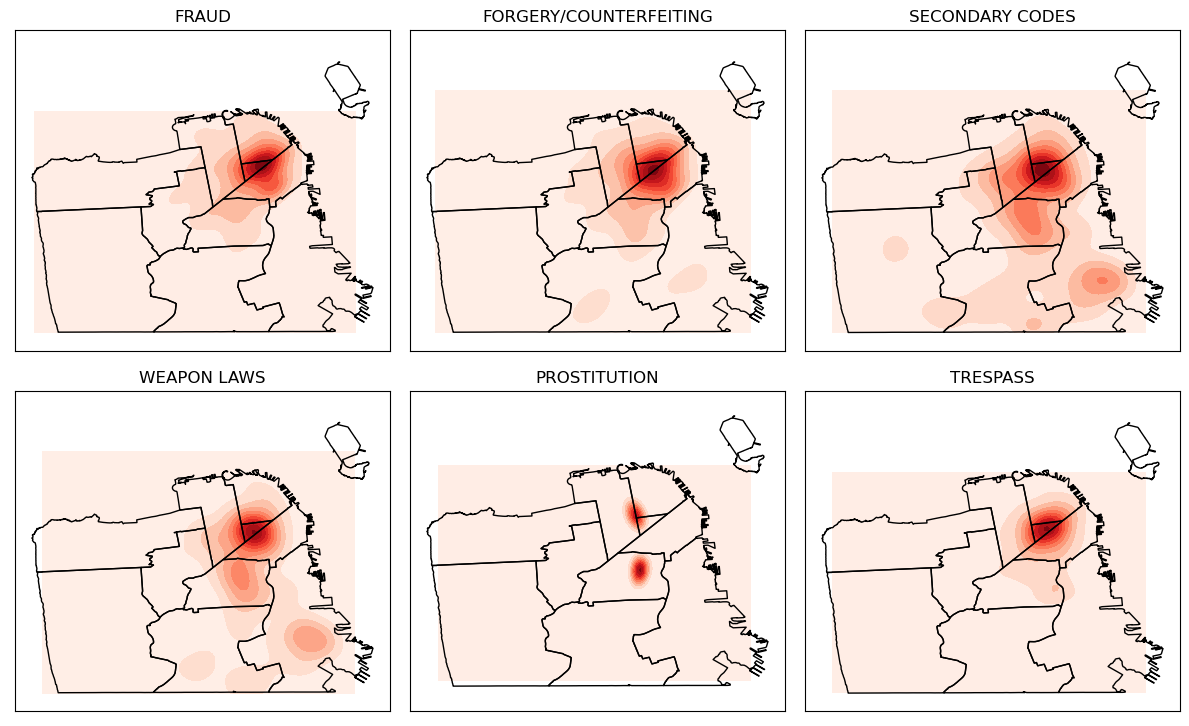

In [23]:
plot_category_distribution(categories[12:18], train_gdf, districts_gdf)

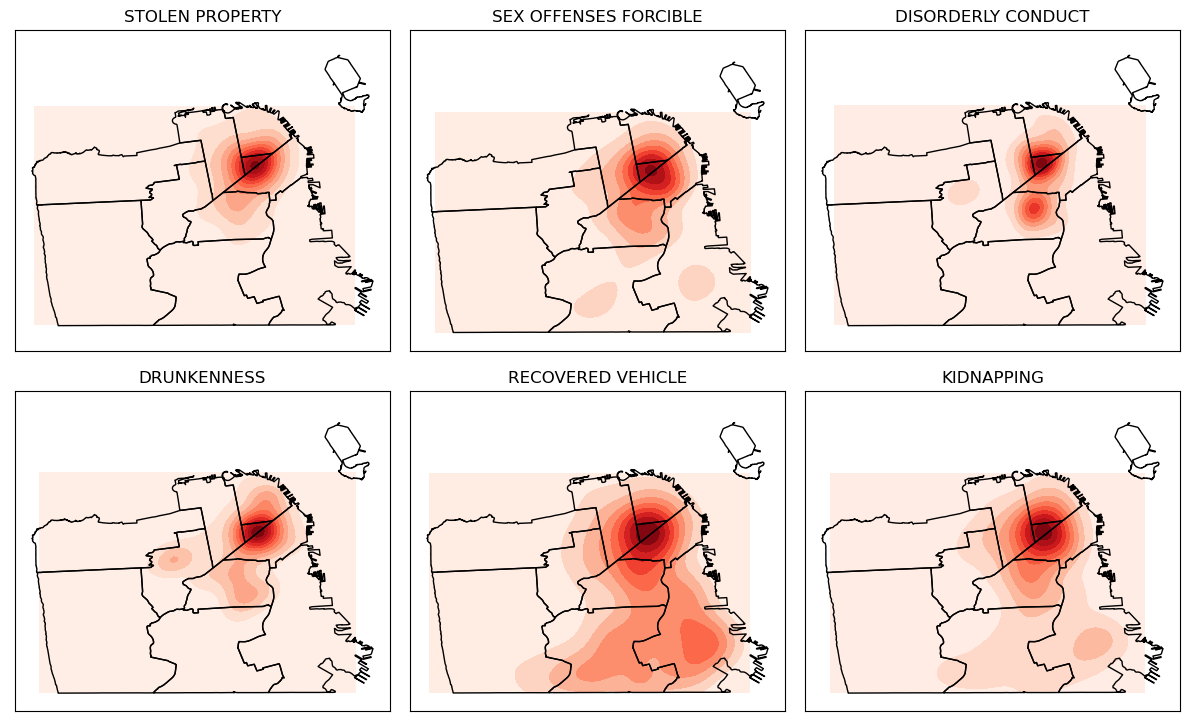

In [24]:
plot_category_distribution(categories[18:24], train_gdf, districts_gdf)

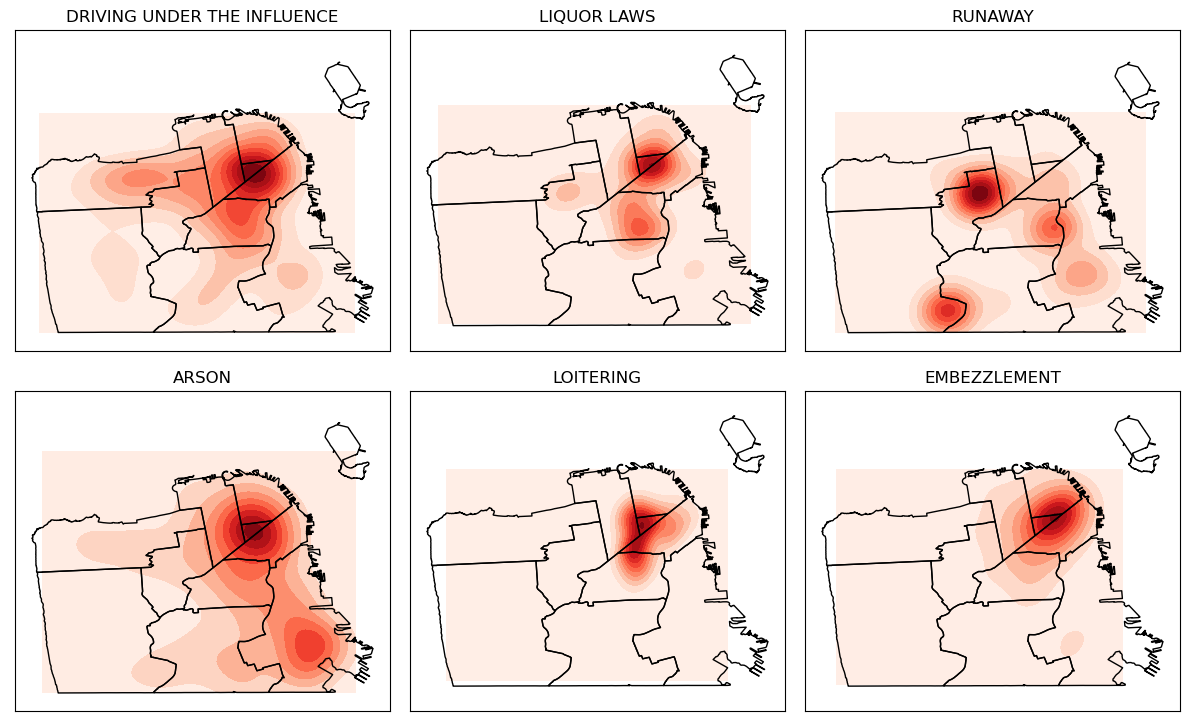

In [25]:
plot_category_distribution(categories[24:30], train_gdf, districts_gdf)

In [26]:
# Count of unique addresses
unique_addresses = train_data['Address'].nunique()
print(f"Number of Unique Addresses: {unique_addresses}")

# Most common addresses
common_addresses = train_data['Address'].value_counts().head(10)
print("\nMost Common Addresses:\n", common_addresses)

# Address Types - Example: Identifying if an address is an intersection
train_data['Address_Type'] = train_data['Address'].apply(lambda x: 'Intersection' if '/' in x else 'Block')

# Check the distribution of address types
address_type_distribution = train_data['Address_Type'].value_counts()
print("\nAddress Type Distribution:\n", address_type_distribution)

# Basic text analysis - Example: Top words in addresses
from collections import Counter
import re

# Split the address into words and count
words = Counter(" ".join(train_data["Address"]).split())
most_common_words = words.most_common(10)
print("\nMost Common Words in Addresses:\n", most_common_words)

Number of Unique Addresses: 23228

Most Common Addresses:
 800 Block of BRYANT ST      26245
800 Block of MARKET ST       6576
2000 Block of MISSION ST     5094
1000 Block of POTRERO AV     4046
900 Block of MARKET ST       3245
0 Block of TURK ST           3224
0 Block of 6TH ST            2882
300 Block of ELLIS ST        2701
400 Block of ELLIS ST        2584
16TH ST / MISSION ST         2501
Name: Address, dtype: int64

Address Type Distribution:
 Block           615322
Intersection    260404
Name: Address_Type, dtype: int64

Most Common Words in Addresses:
 [('ST', 860814), ('Block', 615322), ('of', 615322), ('/', 260404), ('AV', 205807), ('0', 76048), ('100', 51811), ('800', 51364), ('MISSION', 47947), ('MARKET', 42333)]


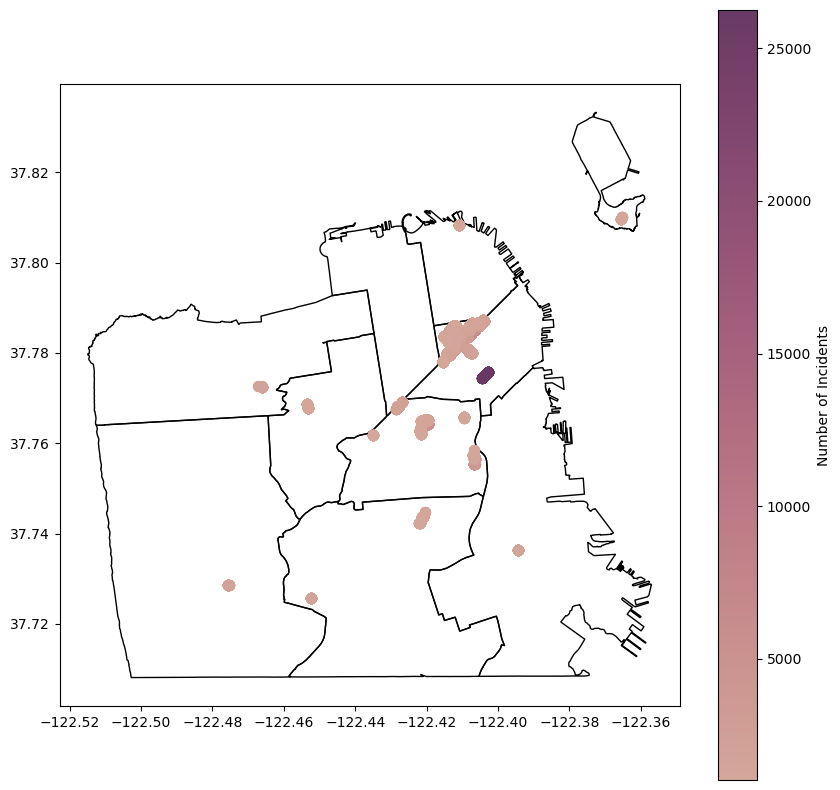

In [27]:
# Identify the 50 most common addresses
top_50_addresses = train_data['Address'].value_counts().head(50)

# Convert the top addresses to a GeoDataFrame
top_addresses_gdf = train_data[train_data['Address'].isin(top_50_addresses.index)].copy()
top_addresses_gdf['geometry'] = top_addresses_gdf.apply(lambda row: Point(row['X'], row['Y']), axis=1)
top_addresses_gdf = gpd.GeoDataFrame(top_addresses_gdf, geometry='geometry')

# Use the earlier defined cubehelix_palette
cubehelix_palette = sns.cubehelix_palette(start=0, rot=0.5, dark=0.3, light=0.7, as_cmap=True)

# Normalize for color mapping
norm = Normalize(vmin=top_50_addresses.min(), vmax=top_50_addresses.max())
cmap = cm.ScalarMappable(norm=norm, cmap=cubehelix_palette)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
districts_gdf.plot(ax=ax, edgecolor='black', facecolor='none')

for address in top_50_addresses.index:
    # Filter data for each address
    data = top_addresses_gdf[top_addresses_gdf['Address'] == address]
    # Plot each address with uniform size but color proportional to frequency
    ax.scatter(data['X'], data['Y'], s=50, color=cmap.to_rgba(top_50_addresses[address]), alpha=0.6)

# Create a colorbar as the legend
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical')
cbar.set_label('Number of Incidents')


In [28]:
# Display the top 50 addresses in a table
pd.set_option('display.max_rows', 100)
print("Top 50 Addresses:\n", top_50_addresses)
pd.reset_option('display.max_rows')

Top 50 Addresses:
 800 Block of BRYANT ST                   26245
800 Block of MARKET ST                    6576
2000 Block of MISSION ST                  5094
1000 Block of POTRERO AV                  4046
900 Block of MARKET ST                    3245
0 Block of TURK ST                        3224
0 Block of 6TH ST                         2882
300 Block of ELLIS ST                     2701
400 Block of ELLIS ST                     2584
16TH ST / MISSION ST                      2501
1000 Block of MARKET ST                   2487
1100 Block of MARKET ST                   2315
2000 Block of MARKET ST                   2166
100 Block of OFARRELL ST                  2135
700 Block of MARKET ST                    2075
3200 Block of 20TH AV                     2030
100 Block of 6TH ST                       1886
500 Block of JOHNFKENNEDY DR              1812
TURK ST / TAYLOR ST                       1810
200 Block of TURK ST                      1796
0 Block of UNITEDNATIONS PZ              

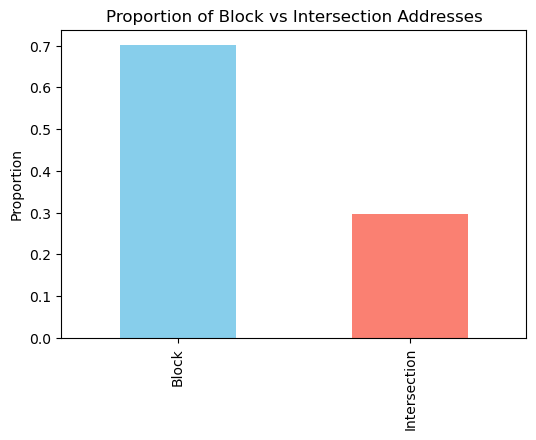

In [29]:
# Plot proportion of Block vs Intersection addresses
plt.figure(figsize=(6, 4))
train_data['Address_Type'] = train_data['Address'].apply(lambda x: 'Intersection' if '/' in x else 'Block')
address_type_counts = train_data['Address_Type'].value_counts(normalize=True)
address_type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proportion of Block vs Intersection Addresses')
plt.ylabel('Proportion')
plt.show()

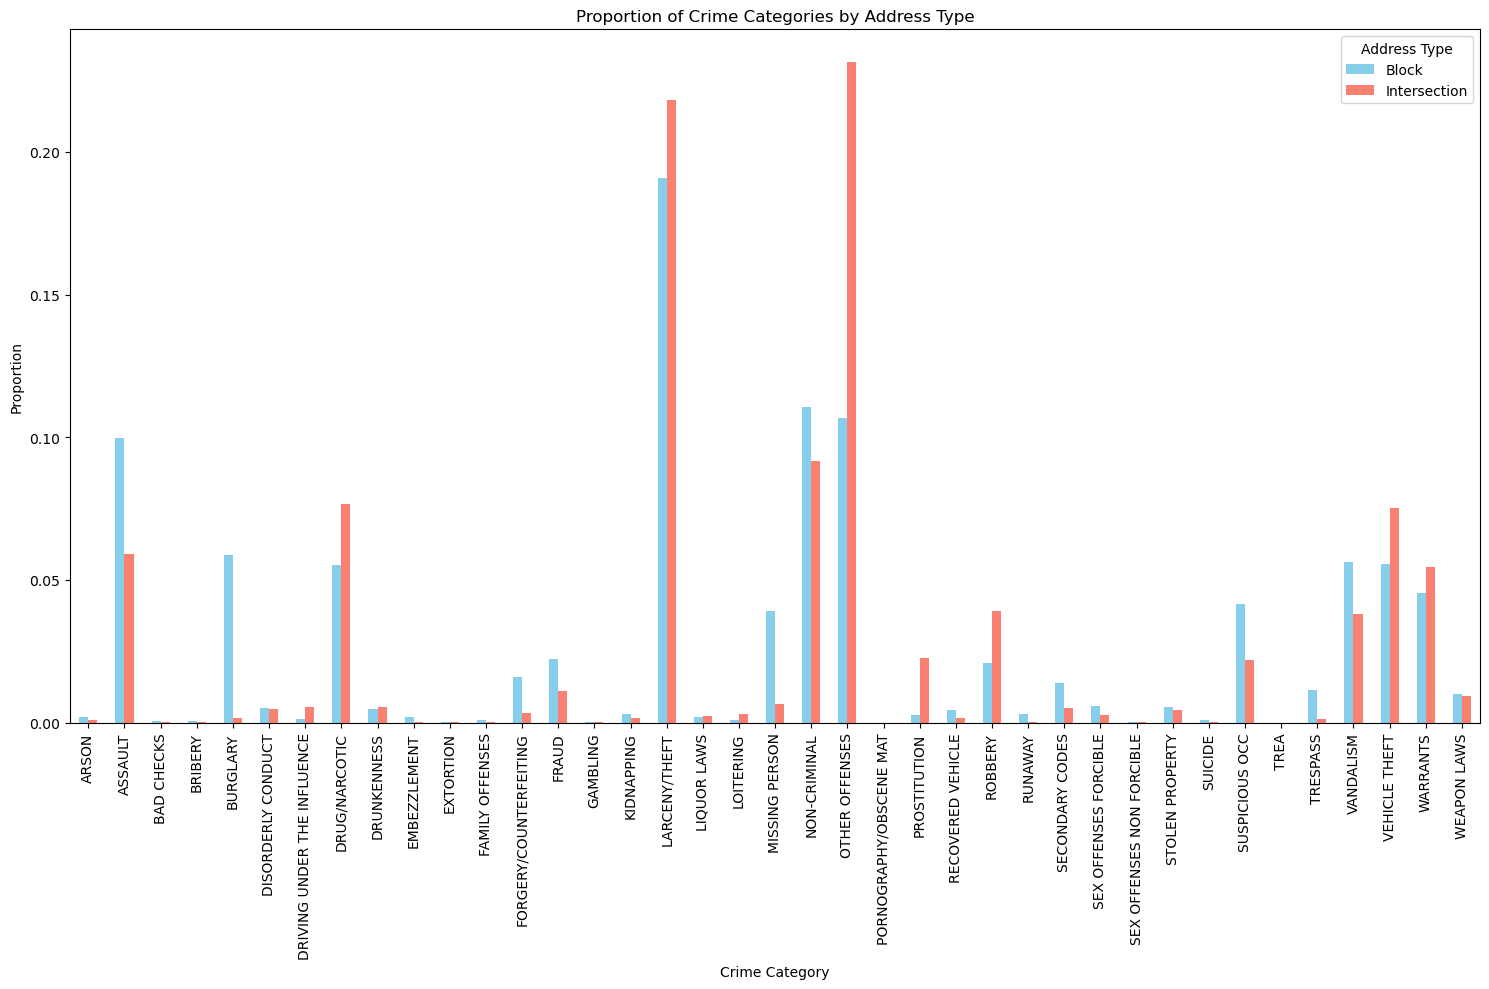

In [30]:
# Determine if each address is a block or an intersection
train_data['Address_Type'] = train_data['Address'].apply(lambda x: 'Intersection' if '/' in x else 'Block')

# Group by Category and Address_Type, then count occurrences
category_address_type_counts = train_data.groupby(['Category', 'Address_Type']).size().reset_index(name='Count')

# Normalize the counts to get proportions within each Address_Type
total_counts_by_type = category_address_type_counts.groupby('Address_Type')['Count'].transform('sum')
category_address_type_counts['Proportion'] = category_address_type_counts['Count'] / total_counts_by_type

# Create a pivot table for plotting
pivot_data = category_address_type_counts.pivot(index='Category', columns='Address_Type', values='Proportion')

# Fill NaN with 0 for categories which do not appear in either Block or Intersection
pivot_data = pivot_data.fillna(0)

# Plotting
plt.figure(figsize=(15, 10))
pivot_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon'])
plt.title('Proportion of Crime Categories by Address Type')
plt.ylabel('Proportion')
plt.xlabel('Crime Category')
plt.xticks(rotation=90)  # Rotate for better readability
plt.legend(title='Address Type')
plt.tight_layout()  # Adjust the layout
plt.show()

## Data Preprocessing and Feature Engineering

In this phase, we prepare the data for modeling by implementing preprocessing and feature engineering steps. These steps are informed by trends observed in the earlier exploratory analysis.

### Key Steps Performed:
1. **Outlier Correction**: Coordinates with outlier values are replaced with the mean coordinates of their respective police districts, enhancing geographical accuracy.
2. **Feature Extraction**: Time-related features like minutes, hours, days, months, and years are extracted from the `Dates` column. Additionally, a binary feature indicating whether an address is a block or an intersection is created, based on our earlier analysis of crime distribution by address type.
3. **Dropping Redundant Columns**: Columns like `Dates`, `Address`, `Descript`, and `Resolution` are dropped post-extraction of relevant features.
4. **Label Encoding**: Categorical features such as `PdDistrict` are converted into numerical format using label encoding, facilitating their use in machine learning models.
5. **Target Variable Encoding**: The `Category` column, our target variable, is encoded to prepare for model training.
6. **Data Splitting**: The dataset is split into training and validation sets, with stratification to maintain the distribution of the target variable.

These preprocessing and feature engineering steps are pivotal for developing a robust model that can accurately classify crime incidents based on patterns and correlations discovered in the exploratory analysis.


In [31]:
def check_coordinate_outliers(data):
    # Defining what we consider an outlier. Adjust these as per your dataset's specifics.
    outlier_criteria = {'X': (-125, -120), 'Y': (35, 40)}
    
    # Calculate the mean coordinates for each district, excluding outliers
    means = data[(data['X'].between(*outlier_criteria['X'])) & 
                 (data['Y'].between(*outlier_criteria['Y']))].groupby('PdDistrict')['X', 'Y'].mean()

    # Function to replace outliers with district mean
    def replace(row):
        if not outlier_criteria['X'][0] < row['X'] < outlier_criteria['X'][1] or \
           not outlier_criteria['Y'][0] < row['Y'] < outlier_criteria['Y'][1]:
            row['X'], row['Y'] = means.loc[row['PdDistrict']]
        return row

    return data.apply(replace, axis=1)

def feature_engineering(data):
    # Extracting date and time features
    data['Minute'] = data['Dates'].dt.minute
    data['Hour'] = data['Dates'].dt.hour
    data['Day'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['DayOfWeek'] = data['Dates'].dt.dayofweek 

    # Creating 'Block' column: 1 if 'Block' in address, 0 otherwise (indicating Intersection)
    data['Block'] = data['Address'].apply(lambda address: 1 if 'block' in address.lower() else 0)

    # Dropping the original 'Dates' and 'Address' columns
    data.drop(columns=['Dates', 'Address', 'Descript', 'Resolution'], inplace=True)

    # Return the transformed dataset
    return data

# Applying the function to your datasets
train = check_coordinate_outliers(train)
train = feature_engineering(train)


# Label encoding for 'PdDistrict'
le_pd_district = LabelEncoder()
train['PdDistrict'] = le_pd_district.fit_transform(train['PdDistrict'])

# Assuming 'Category' is the target variable in the training dataset
le_category = LabelEncoder()
y = le_category.fit_transform(train.pop('Category'))

# Splitting the data with stratification
train_X, val_X, train_y, val_y = train_test_split(train, y, test_size=0.2, stratify=y, random_state=42)

C:\Users\user\AppData\Local\Temp\ipykernel_38336\3696824976.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = data[(data['X'].between(*outlier_criteria['X'])) &


# Model Selection

In this section, we aim to identify the best performing base models for the task of crime classification. This process involves evaluating a variety of machine learning models to determine which offers the most accurate predictions.

## Approach:
- **Model Evaluation**: A range of models, including both simple and complex algorithms, are tested. This includes `DummyClassifier`, `LogisticRegression`, `KNeighborsClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`, `GradientBoostingClassifier`, `XGBoost`, `LightGBM`, `CatBoostClassifier`, `GaussianNB`, and `MLPClassifier`.
- **Performance Metric**: Each model's performance is measured using the Log Loss metric, which quantifies the accuracy of a classifier by penalizing false classifications. Lower Log Loss values indicate better performance.
- **Calibration for Linear Models**: For linear models like `SGDClassifier` and `RidgeClassifier`, we use `CalibratedClassifierCV` to provide probability estimates, which are necessary for calculating Log Loss.
- **Time Efficiency**: The time taken to train each model is also recorded, providing insights into the trade-off between accuracy and computational efficiency.

The outcome of this selection process will be the identification of the most effective base models for further tuning and optimization in our crime classification task.


In [32]:
# Models
models = {
    'Dummy': DummyClassifier(strategy='most_frequent'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'GBM': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(max_iter=1000)
}

# Evaluate models
for name, model in models.items():
    start_time = time.time()
    # Fit the model on the training data
    model.fit(train_X, train_y)
    # Predict probabilities on the validation data
    predictions = model.predict_proba(val_X)
    # Calculate Log Loss
    logloss = log_loss(val_y, predictions)
    end_time = time.time()
    print(f"{name} - Log Loss: {logloss:.4f}, Time: {end_time - start_time:.2f} seconds")

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Dummy - Log Loss: 27.6589, Time: 0.17 seconds


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Log Loss: 2.6268, Time: 428.44 seconds
KNN - Log Loss: 18.1931, Time: 19.77 seconds
RandomForest - Log Loss: 4.8313, Time: 267.89 seconds
AdaBoost - Log Loss: 3.6124, Time: 153.22 seconds
GBM - Log Loss: 2.3671, Time: 3968.71 seconds
XGBoost - Log Loss: 2.2488, Time: 316.95 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 702439, number of used features: 10
[LightGBM] [Info] Start training from score -6.363938
[LightGBM] [Info] Start training from score -2.435505
[LightGBM] [Info] Start training from score -7.678489
[LightGBM] [Info] Start training from score -8.019896
[LightGBM] [Info] Start training from score -3.173428
[LightGBM] [Info] Start training from score -5.314447
[LightGBM] [Info] S

In [33]:
# For SGDClassifier
sgd_start_time = time.time()
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(train_X, train_y)  # Fit the SGDClassifier
calibrated_sgd = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_sgd.fit(train_X, train_y)  # Fit the CalibratedClassifierCV
sgd_predictions = calibrated_sgd.predict_proba(val_X)
sgd_logloss = log_loss(val_y, sgd_predictions)
sgd_end_time = time.time()
sgd_time = sgd_end_time - sgd_start_time

# For RidgeClassifier
ridge_start_time = time.time()
ridge = RidgeClassifier()
ridge.fit(train_X, train_y)  # Fit the RidgeClassifier
calibrated_ridge = CalibratedClassifierCV(ridge, method='sigmoid')
calibrated_ridge.fit(train_X, train_y)  # Fit the CalibratedClassifierCV
ridge_predictions = calibrated_ridge.predict_proba(val_X)
ridge_logloss = log_loss(val_y, ridge_predictions)
ridge_end_time = time.time()
ridge_time = ridge_end_time - ridge_start_time

print(f"SGDClassifier - Log Loss: {sgd_logloss}, Time: {sgd_time:.2f} seconds")
print(f"RidgeClassifier - Log Loss: {ridge_logloss}, Time: {ridge_time:.2f} seconds")

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_

SGDClassifier - Log Loss: 2.5804137032166685, Time: 5479.93 seconds
RidgeClassifier - Log Loss: 2.5436349379321763, Time: 71.18 seconds


## Model Tuning Summary

### Choosing XGBoost
XGBoost was selected for its superior balance between accuracy (lowest Log Loss: 2.2488) and time efficiency (moderate training time: 386.90 seconds). This combination makes it ideal for scenarios demanding both precision and speed.

### Why Bayesian Optimization?
Bayesian Optimization is used for its efficiency in hyperparameter tuning. It smartly navigates the hyperparameter space, using past evaluations to inform future choices, reducing the number of trials needed to find the optimal settings.

### The Tuning Process
The tuning involves defining a hyperparameter search space, setting an objective function (focusing on minimizing Log Loss and tracking time efficiency), and iteratively running the Bayesian Optimization algorithm. This approach efficiently identifies the best-performing XGBoost model parameters, ensuring a practical balance of accuracy and computational cost.

  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7018914514602411, 'learning_rate': 0.14772841748637722, 'max_depth': 9, 'n_estimators': 550, 'subsample': 0.7992248893814524}, Log Loss: 2.2571, Time: 3970.91 seconds
  3%|▎         | 1/30 [1:06:11<31:59:23, 3971.16s/trial, best loss: 2.2570585978922533]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6091214201904842, 'learning_rate': 0.07642192424540399, 'max_depth': 5, 'n_estimators': 650, 'subsample': 0.7294614037987296}, Log Loss: 2.2432, Time: 2623.37 seconds
  7%|▋         | 2/30 [1:49:54<24:43:14, 3178.38s/trial, best loss: 2.2431694577913333]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7280875106416751, 'learning_rate': 0.21916725170983675, 'max_depth': 9, 'n_estimators': 450, 'subsample': 0.6232199315507362}, Log Loss: 2.3194, Time: 3275.75 seconds
 10%|█         | 3/30 [2:44:30<24:10:19, 3222.93s/trial, best loss: 2.2431694577913333]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6231546832641016, 'learning_rate': 0.08150532024554481, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.6850155181764674}, Log Loss: 2.2097, Time: 2411.53 seconds
 13%|█▎        | 4/30 [3:24:42<20:57:49, 2902.67s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7158663529099303, 'learning_rate': 0.21951632574717483, 'max_depth': 5, 'n_estimators': 550, 'subsample': 0.7937775404455414}, Log Loss: 2.2341, Time: 2209.55 seconds
 17%|█▋        | 5/30 [4:01:31<18:25:18, 2652.74s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6622407294330844, 'learning_rate': 0.12343041646001847, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7174389750743975}, Log Loss: 2.2399, Time: 2012.49 seconds
 20%|██        | 6/30 [4:35:04<16:14:01, 2435.06s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7584928408161087, 'learning_rate': 0.09478029440711407, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.7730494858792987}, Log Loss: 2.2108, Time: 2830.83 seconds
 23%|██▎       | 7/30 [5:22:15<16:23:03, 2564.51s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6326818707188844, 'learning_rate': 0.22009952648658365, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.7708766295269012}, Log Loss: 2.2668, Time: 2392.19 seconds
 27%|██▋       | 8/30 [6:02:07<15:20:13, 2509.71s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7565701983158495, 'learning_rate': 0.10872410234552461, 'max_depth': 5, 'n_estimators': 450, 'subsample': 0.6439851316403342}, Log Loss: 2.2436, Time: 1883.21 seconds
 30%|███       | 9/30 [6:33:30<13:29:51, 2313.87s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6960774680876596, 'learning_rate': 0.10599135645979561, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.7398573404997173}, Log Loss: 2.2148, Time: 2751.79 seconds
 33%|███▎      | 10/30 [7:19:22<13:36:22, 2449.12s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6210967409244392, 'learning_rate': 0.26220126405551597, 'max_depth': 11, 'n_estimators': 300, 'subsample': 0.7012527812495988}, Log Loss: 2.3904, Time: 2541.57 seconds
 37%|███▋      | 11/30 [8:01:45<13:04:35, 2477.64s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.76499855602647, 'learning_rate': 0.18530605458524385, 'max_depth': 7, 'n_estimators': 350, 'subsample': 0.703477963076792}, Log Loss: 2.2296, Time: 1964.83 seconds
 40%|████      | 12/30 [8:34:30<11:36:29, 2321.65s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7129073271560479, 'learning_rate': 0.21820264962371005, 'max_depth': 5, 'n_estimators': 450, 'subsample': 0.6210958613183928}, Log Loss: 2.2393, Time: 1897.19 seconds
 43%|████▎     | 13/30 [9:06:07<10:21:22, 2193.08s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6968556947004606, 'learning_rate': 0.05856918399183621, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7361513056825263}, Log Loss: 2.2260, Time: 2707.82 seconds
 47%|████▋     | 14/30 [9:51:15<10:26:17, 2348.59s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7643528553772071, 'learning_rate': 0.19191216142211837, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.7951892578637226}, Log Loss: 2.2370, Time: 1614.26 seconds
 50%|█████     | 15/30 [10:18:09<8:51:48, 2127.24s/trial, best loss: 2.2096749576239065] 

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7990339090728505, 'learning_rate': 0.07610654015168071, 'max_depth': 5, 'n_estimators': 550, 'subsample': 0.6649513530154711}, Log Loss: 2.2464, Time: 2288.62 seconds
 53%|█████▎    | 16/30 [10:56:18<8:27:41, 2175.83s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6431952062960136, 'learning_rate': 0.07362882940137049, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.7662149531903601}, Log Loss: 2.2460, Time: 2390.67 seconds
 57%|█████▋    | 17/30 [11:36:08<8:05:25, 2240.44s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6461001497465549, 'learning_rate': 0.25811991591178046, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.7862354630693709}, Log Loss: 2.5241, Time: 4163.55 seconds
 60%|██████    | 18/30 [12:45:34<9:23:45, 2818.83s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6580344966963094, 'learning_rate': 0.1702208511193522, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7529355044908773}, Log Loss: 2.2461, Time: 1188.67 seconds
 63%|██████▎   | 19/30 [13:05:22<7:07:01, 2329.23s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6031519758049129, 'learning_rate': 0.20067812287543813, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.6837469616785111}, Log Loss: 2.2489, Time: 2073.47 seconds
 67%|██████▋   | 20/30 [13:39:56<6:15:24, 2252.49s/trial, best loss: 2.2096749576239065]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7810062460841741, 'learning_rate': 0.0533778401769596, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6787498907274437}, Log Loss: 2.2070, Time: 5020.66 seconds
 70%|███████   | 21/30 [15:03:37<7:42:32, 3083.56s/trial, best loss: 2.2070137408946446]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6754501803633993, 'learning_rate': 0.05322426819881021, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6697170047476512}, Log Loss: 2.2064, Time: 4841.73 seconds
 73%|███████▎  | 22/30 [16:24:20<8:01:31, 3611.39s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6754899238961293, 'learning_rate': 0.29363839993629215, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.65165060658436}, Log Loss: 2.5028, Time: 4882.60 seconds
 77%|███████▋  | 23/30 [17:45:43<7:45:51, 3993.00s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7951874536288108, 'learning_rate': 0.05424701003369744, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6050206332755553}, Log Loss: 2.2089, Time: 5133.80 seconds
 80%|████████  | 24/30 [19:11:17<7:13:32, 4335.46s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7380356493891744, 'learning_rate': 0.13274087538446505, 'max_depth': 11, 'n_estimators': 700, 'subsample': 0.6724864453876009}, Log Loss: 2.4044, Time: 6255.90 seconds
 83%|████████▎ | 25/30 [20:55:37<6:49:24, 4912.81s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.6794849477987637, 'learning_rate': 0.05020014307189217, 'max_depth': 7, 'n_estimators': 700, 'subsample': 0.6442291093968726}, Log Loss: 2.2226, Time: 3968.51 seconds
 87%|████████▋ | 26/30 [22:01:45<5:08:38, 4629.55s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7831202170565045, 'learning_rate': 0.15480362097644404, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6261035424204671}, Log Loss: 2.3152, Time: 5107.39 seconds
 90%|█████████ | 27/30 [23:26:53<3:58:39, 4773.07s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.679606044564178, 'learning_rate': 0.12561919378674533, 'max_depth': 9, 'n_estimators': 650, 'subsample': 0.6865111139956908}, Log Loss: 2.2571, Time: 4391.30 seconds
 93%|█████████▎| 28/30 [24:40:05<2:35:17, 4658.70s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.7435193328483357, 'learning_rate': 0.14358739739154758, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6607197806992933}, Log Loss: 2.2947, Time: 4989.39 seconds
 97%|█████████▋| 29/30 [26:03:15<1:19:18, 4758.08s/trial, best loss: 2.2064128574536888]

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Params: {'colsample_bytree': 0.783354815347296, 'learning_rate': 0.05257067523627619, 'max_depth': 7, 'n_estimators': 600, 'subsample': 0.7167937782982964}, Log Loss: 2.2225, Time: 3303.75 seconds
100%|██████████| 30/30 [26:58:19<00:00, 3236.65s/trial, best loss: 2.2064128574536888]  


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'colsample_bytree': 0.6754501803633993, 'learning_rate': 0.05322426819881021, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6697170047476512}
Best model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6754501803633993, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05322426819881021, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)


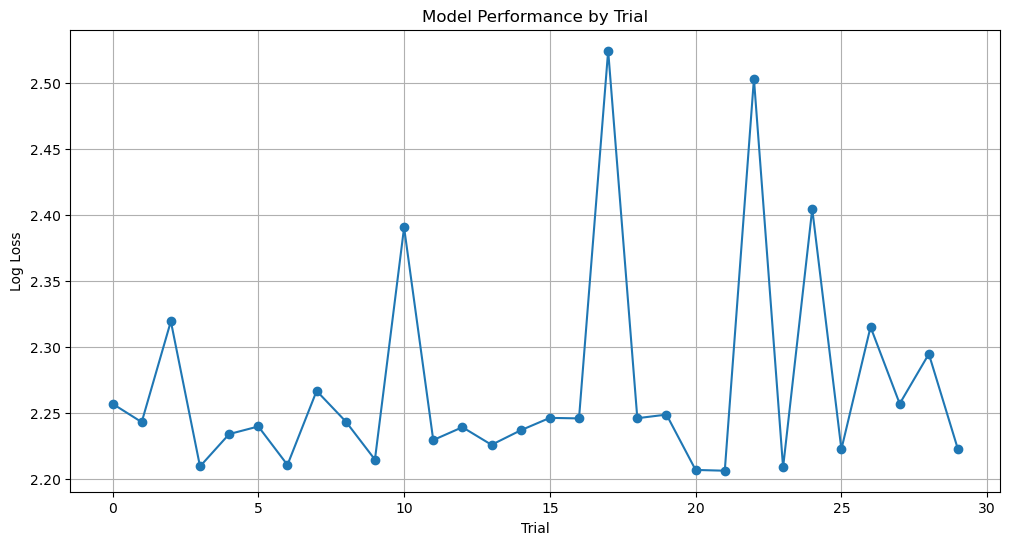

In [34]:
# Define the search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', range(300, 701, 50)),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
    'max_depth': hp.choice('max_depth', range(5, 12, 2)),
    'subsample': hp.uniform('subsample', 0.6, 0.8),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8)
}

# Objective function to minimize
def objective(params):
    start = time.time()
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(train_X, train_y)
    predictions = model.predict_proba(val_X)
    logloss = log_loss(val_y, predictions)
    end = time.time()
    time_elapsed = end - start
    print(f"Params: {params}, Log Loss: {logloss:.4f}, Time: {time_elapsed:.2f} seconds")
    return {'loss': logloss, 'status': STATUS_OK, 'time': time_elapsed}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)

best_params = space_eval(space, best)
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(train_X, train_y)

print("Best parameters:", best_params)
print("Best model:", best_model)

# Plotting the performance
log_loss_values = [x['result']['loss'] for x in trials.trials]

plt.figure(figsize=(12, 6))
plt.plot(log_loss_values, marker='o')
plt.title('Model Performance by Trial')
plt.xlabel('Trial')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

In [38]:
test_data = pd.read_csv(r'C:\Users\user\Desktop\Kaggle_SF_Crime\test.csv', parse_dates=['Dates'], index_col='Id')

def test_feature_engineering(data):
    # Extracting date and time features
    data['Minute'] = data['Dates'].dt.minute
    data['Hour'] = data['Dates'].dt.hour
    data['Day'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['DayOfWeek'] = data['Dates'].dt.dayofweek 

    # Creating 'Block' column: 1 if 'Block' in address, 0 otherwise (indicating Intersection)
    data['Block'] = data['Address'].apply(lambda address: 1 if 'block' in address.lower() else 0)

    # Dropping the original 'Dates' and 'Address' columns
    data.drop(columns=['Dates', 'Address'], inplace=True)

    # Return the transformed dataset
    return data

# Apply the same feature engineering steps to the test data
test_data = check_coordinate_outliers(test_data)
test_data = test_feature_engineering(test_data)

# Label encode 'PdDistrict' in test data using the same encoder as for the training data
test_data['PdDistrict'] = le_pd_district.transform(test_data['PdDistrict'])

# Make predictions on the test data using the best model
test_predictions = best_model.predict_proba(test_data)

# Convert predictions to DataFrame
prediction_columns = le_category.classes_  # Get the class names from the label encoder
prediction_df = pd.DataFrame(test_predictions, columns=prediction_columns)

# Create the sample submission
submission = pd.DataFrame({'Id': test_data.index})
submission = pd.concat([submission, prediction_df], axis=1)

# Save the submission to a CSV file
submission.to_csv('submission.csv', index='Id')

# Print a preview of the submission file
print(submission.head())

C:\Users\user\AppData\Local\Temp\ipykernel_38336\3696824976.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = data[(data['X'].between(*outlier_criteria['X'])) &


   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.002199  0.139446    0.000002  0.000041  0.031880            0.001027   
1   1  0.000766  0.034346    0.000003  0.000042  0.000944            0.000392   
2   2  0.004372  0.191418    0.000013  0.000044  0.088175            0.000638   
3   3  0.002272  0.154409    0.000003  0.000304  0.015103            0.001004   
4   4  0.002272  0.154409    0.000003  0.000304  0.015103            0.001004   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.008520       0.013247     0.001751  ...   
1                     0.003721       0.031030     0.000774  ...   
2                     0.000878       0.010658     0.006698  ...   
3                     0.001549       0.006563     0.008558  ...   
4                     0.001549       0.006563     0.008558  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000012       